## Imports and settings


In [26]:
# !pip install m3_learning
# 

In [1]:
import sys
import glob
import os
sys.path.append('./../')
sys.path.append('./../../src/')
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import hyperspy.api as hs
import torch
import h5py
from ipywidgets import interact
from pprint import pprint

# import nn
from m3_learning.nn.random import random_seed
from m3_learning.viz.style import set_style
from m3_learning.viz.printing import printer
from m3_learning.viz.Movies import make_movie
from m3_learning.util.file_IO import download_and_unzip

from m3_learning.nn.STEM_AE_multimodal.Dataset import STEM_EELS_Dataset
from m3_learning.nn.STEM_AE_multimodal.Viz import Viz_Multimodal
from m3_learning.nn.STEM_AE_multimodal.STEM_AE import ConvAutoencoder_Multimodal,ConvAutoencoder_1D,ConvAutoencoder_2D

2024-02-20 21:02:04.205037: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-20 21:02:04.230612: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-20 21:02:04.230649: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-20 21:02:04.231423: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-20 21:02:04.235875: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-20 21:02:04.236400: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
# Specify the filename and the path to save the file
save_path = './../../../../Northwestern_link/Northwestern_Multimodal'
fig_path = save_path + "_Figures/"

# builds the printer object
printing = printer(basepath=fig_path,fileformats=['png'])

# Set the style of the plots
set_style("printing")

# Set the random seed for reproducibility
random_seed(seed=42)

%matplotlib inline

printing set for seaborn
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42


## Domains 

### Peek

In [9]:
diffraction_files = glob.glob(f'{save_path}/*/diff*/Diffraction SI.dm4')
eels_files = glob.glob(f'{save_path}/*/eels*/Diffraction SI.dm4')

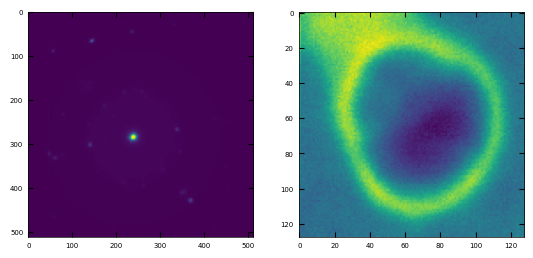

In [31]:
filename = '/home/m3learning/Northwestern/m3_learning/m3_learning/Northwestern_Multimodal/TRI-8c-5-AuCo/diff-01/Diffraction SI.dm4'


s = hs.load(filename)
fig,ax = plt.subplots(1,2)
ax[0].imshow(np.log(s.data+1).mean(axis=(0,1)))
ax[1].imshow(np.log(s.data+1).mean(axis=(2,3)))

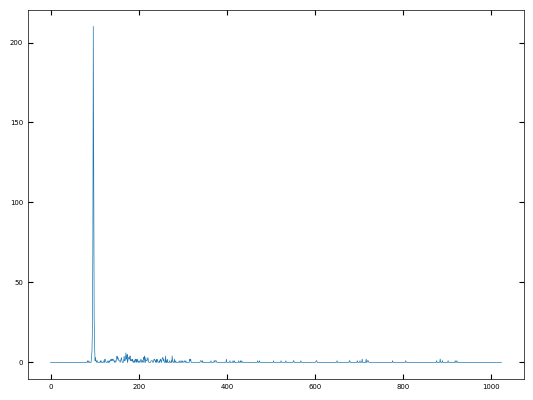

In [124]:
filename = '/home/m3learning/Northwestern/Northwestern_link/Northwestern_Multimodal/TRI-8c-5-AuCo/eels-02/EELS LL SI.dm4'


t = hs.load(filename)
plt.plot(t.data[0,0])

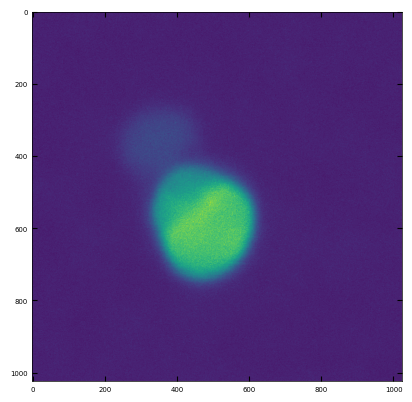

In [37]:
filename = '/home/m3learning/Northwestern/m3_learning/m3_learning/Northwestern_Multimodal/TRI-8c-5-AuCo/eels-01/ADF Image (SI Survey).dm4'


s = hs.load(filename)
plt.imshow(s.data)

### Loads the Dataset

save in format (save_folder)/particles/instrument/composition/SI data (#)/Diffraction SI.dm4 for correct data processing

In [3]:
dset = STEM_EELS_Dataset(save_path, 
                 EELS_roi={'LL':[(-31+15.5,276)], 'HL': [(501+15.5,809)]},
                 overwrite_eels=False,
                 overwrite_diff=False,)

fetching metadata...


 41%|████▏     | 12/29 [00:01<00:01, 10.84it/s]

bad:
	 ./../../../../Northwestern_link/Northwestern_Multimodal/TRI-8c-5-AuCo/diff-12/Diffraction SI.dm4
	 ./../../../../Northwestern_link/Northwestern_Multimodal/TRI-8c-5-AuCo/eels-12/EELS LL SI.dm4
	 ./../../../../Northwestern_link/Northwestern_Multimodal/TRI-8c-5-AuCo/eels-12/EELS HL SI.dm4


 97%|█████████▋| 28/29 [00:04<00:00,  6.68it/s]


27 valid samples

getting spectral axis labels...
fitting scalers...
	Diffraction finished: 10.393885374069214 s
	EELS finished 0.003307819366455078 s
finding brightfield indices...


100%|██████████| 27/27 [00:15<00:00,  1.75it/s]


finding High Loss background spectrum...


100%|██████████| 27/27 [00:05<00:00,  4.62it/s]

done


In [46]:
from ipywidgets import interact

h = dset.open_h5()
def f(x):
    i,diff,eels = dset[x]
    fig, ax = plt.subplots(3)  # Creates two subplots
    ax[0].imshow(diff.squeeze())
    ax[1].plot(eels[0])
    ax[2].plot(eels[1])
        
interact(f,x=(0,len(dset)-1))

interactive(children=(IntSlider(value=254951, description='x', max=509903), Output()), _dom_classes=('widget-i…

<function __main__.f(x)>

In [28]:
dset.meta['shape_list']

[((128, 128, 512, 512), (128, 128, 1024), (128, 128, 1024)),
 ((128, 128, 512, 512), (128, 128, 1024), (128, 128, 1024)),
 ((128, 128, 512, 512), (128, 128, 1024), (128, 128, 1024)),
 ((128, 128, 512, 512), (128, 128, 1024), (128, 128, 1024)),
 ((128, 128, 512, 512), (128, 128, 1024), (128, 128, 1024)),
 ((140, 140, 512, 512), (140, 140, 1024), (140, 140, 1024)),
 ((140, 140, 512, 512), (140, 140, 1024), (140, 140, 1024)),
 ((140, 140, 512, 512), (140, 140, 1024), (140, 140, 1024)),
 ((140, 140, 512, 512), (140, 140, 1024), (140, 140, 1024)),
 ((140, 140, 512, 512), (140, 140, 1024), (140, 140, 1024)),
 ((140, 140, 512, 512), (140, 140, 1024), (140, 140, 1024)),
 ((140, 140, 512, 512), (140, 140, 1024), (140, 140, 1024)),
 ((140, 140, 512, 512), (140, 140, 1024), (140, 140, 1024)),
 ((140, 140, 512, 512), (140, 140, 1024), (140, 140, 1024)),
 ((140, 140, 512, 512), (140, 140, 1024), (140, 140, 1024)),
 ((140, 140, 512, 512), (140, 140, 1024), (140, 140, 1024)),
 ((140, 140, 512, 512), 

In [37]:
with dset.open_h5() as h:
    print(h['processed_data']['eels'])

<HDF5 dataset "eels": shape (509904, 2, 975), type "<f8">


In [23]:
p=0
s = dset.meta['shape_list'][p][1]
istart = dset.meta['particle_inds'][p]
iend = dset.meta['particle_inds'][p+1]
with dset.open_h5() as h:
    data = h['processed_data']['eels'][istart:iend].reshape(s[0],s[1],2,-1)
k=4

def f(x,y):
    fig, ax = plt.subplots(2,2) 
    ax = ax.flatten()
    ax[0].imshow(data[:,:,0].mean(2))
    ax[0].scatter(x, y, facecolors='none', edgecolors='r', marker='s', s=(k*2+1)**2)
    ax[1].imshow(data[:,:,1].mean(2))
    ax[1].scatter(x, y, facecolors='none', edgecolors='r', marker='s', s=(k*2+1)**2)
    
    ax[2].plot(data[x-k:x+k,y-k:y+k,0].mean((0,1)))
    ax[3].plot(data[x-k:x+k,y-k:y+k,1].mean((0,1)))

In [24]:
interact(f,x=(0,140),y=(0,140))

interactive(children=(IntSlider(value=70, description='x', max=140), IntSlider(value=70, description='y', max=…

<function __main__.f(x, y)>

### Visualizes the Raw Data


In [68]:
# instantiates the visualization class
viz = Viz_Multimodal(printer=printing, labelfigs_=True)
viz.scalebar_ = {"width": 250, "scale length": 100, "units": "nm", "channel": -1}

In [6]:
# # TODO: fix the bright/darkfield viz, and the avg. By Particle.
for i in range(len(dset)):
    viz.STEM_raw_and_virtual(
        dset,i,
        scalebar_=True,
    )

AttributeError: 'Viz_Multimodal' object has no attribute 'h5_name'

In [12]:
# # TODO: Do masking by particle. Record location/radius
# # TODO: fix the bright/darkfield viz, and the avg. By Particle.
# # bright_field_ = bbox
# # # dark_field_ = (dx1,dx2,dy1,dy2)
# filename = "STEM_raw_and_virtual_particle_62"
# viz.STEM_raw_and_virtual(
#     domain,
#     # bright_field_=bright_field_,
#     dark_field_=dark_field_,
#     scalebar_=True,
#     datapath=f'{save_path}/SI data (*)',
#     shape_=domain.data.shape,
# )

## Builds the Neural Network Model


In [6]:
# bout 1 min 6 sec
channels_1D = dset.shape[1][1] # number of channels
encoder_step_size_1D = dset.shape[1][-1] # length of eels spectrum
encoder_step_size_2D = dset.shape[0][-2:] # original shape opf diffraction pattern

pooling_list_1D = [5, 5, 3] # 975 --> 13
pooling_list_2D = [4, 4, 4] # 512,512 --> 8,8

decoder_step_size_1D = 39
decoder_step_size_2D = [8, 8]

upsampling_list_1D = [5,5]
upsampling_list_2D = [8, 8]

embedding_size_1D = 13*2 # from flattening channels but you can choose whatever you want
embedding_size_2D = 32 # you can shoose whatever you want
embedding_size = 32


conv_size_1D = 128
conv_size_2D = 128
attn_heads = 3

# set device to load model
device = "cpu"
if torch.cuda.is_available():
    device = "cuda:0"


## train 1D and 2D separately

## 1d

In [ ]:
# look at input images


In [7]:
model1 = ConvAutoencoder_1D(
            encoder_step_size_1D,
            pooling_list_1D,
            decoder_step_size_1D,
            upsampling_list_1D,
            embedding_size,
            channels_1D,
            conv_size_1D,
            device,
            attn_heads,
            learning_rate=3e-5,
        )

In [9]:
# Load?
model1.checkpoint = '/home/m3learning/Northwestern/m3_learning/m3_learning/papers/Multimodal/Combined_all_samples_1D/(2024-02-18)_epoch:0019_l1coef:0.0000_lr:0.00003_trainloss:0.5170.pkl'

model1.load_weights('/home/m3learning/Northwestern/m3_learning/m3_learning/papers/Multimodal/Combined_all_samples_1D/(2024-02-18)_epoch:0019_l1coef:0.0000_lr:0.00003_trainloss:0.5170.pkl')

"Unable to open object (object 'scaleshear_(2024-02-18)_epoch:0019_l1coef:0.0000_lr:0.00003_trainloss:0.5170' doesn't exist)"
Embedding and affines not opened
Unable to open file (bad object header version number)
Generated not opened


In [11]:
with model1.open_generated_h() as he:
    print(he.keys())

OSError: Unable to open file (bad object header version number)

In [15]:
st = 3
## TODO: get rid of translation
## TODO: should I add weights for the relative contributions of spectra and diffraction?
for ep in np.arange(1,20):
    model1.Train(
        dset,
        coef_1=(1e-5*ep)//st,
        coef_2=(1e-5*ep)//st,
        epoch_=ep,
        epochs=ep+1,
        with_scheduler=False,
        folder_path="Combined_all_samples_1D",
        batch_size=16, # max 16 on h100
        save_emb_every=100
    )

  0%|          | 0/31869 [00:00<?, ?it/s]

100%|██████████| 31869/31869 [1:12:41<00:00,  7.31it/s]


Epoch: 001/002 | Train Loss: 0.5175
.............................


100%|██████████| 31869/31869 [1:12:30<00:00,  7.33it/s]


Epoch: 002/003 | Train Loss: 0.5174
.............................


100%|██████████| 31869/31869 [1:12:22<00:00,  7.34it/s]


Epoch: 003/004 | Train Loss: 0.5173
.............................


100%|██████████| 31869/31869 [1:12:21<00:00,  7.34it/s]


Epoch: 004/005 | Train Loss: 0.5173
.............................


100%|██████████| 31869/31869 [1:12:47<00:00,  7.30it/s]


Epoch: 005/006 | Train Loss: 0.5172
.............................


100%|██████████| 31869/31869 [1:12:26<00:00,  7.33it/s]


Epoch: 006/007 | Train Loss: 0.5172
.............................


100%|██████████| 31869/31869 [1:12:04<00:00,  7.37it/s]


Epoch: 007/008 | Train Loss: 0.5171
.............................


100%|██████████| 31869/31869 [1:11:57<00:00,  7.38it/s]


Epoch: 008/009 | Train Loss: 0.5171
.............................


100%|██████████| 31869/31869 [1:11:31<00:00,  7.43it/s]


Epoch: 009/010 | Train Loss: 0.5171
.............................


100%|██████████| 31869/31869 [1:12:19<00:00,  7.34it/s]


Epoch: 010/011 | Train Loss: 0.5171
.............................


100%|██████████| 31869/31869 [1:12:39<00:00,  7.31it/s]


Epoch: 011/012 | Train Loss: 0.5171
.............................


100%|██████████| 31869/31869 [1:12:12<00:00,  7.36it/s]


Epoch: 012/013 | Train Loss: 0.5171
.............................


100%|██████████| 31869/31869 [1:11:52<00:00,  7.39it/s]


Epoch: 013/014 | Train Loss: 0.5171
.............................


100%|██████████| 31869/31869 [1:11:58<00:00,  7.38it/s]


Epoch: 014/015 | Train Loss: 0.5171
.............................


100%|██████████| 31869/31869 [1:12:10<00:00,  7.36it/s]


Epoch: 015/016 | Train Loss: 0.5171
.............................


100%|██████████| 31869/31869 [1:12:15<00:00,  7.35it/s]


Epoch: 016/017 | Train Loss: 0.5171
.............................


100%|██████████| 31869/31869 [1:11:52<00:00,  7.39it/s]


Epoch: 017/018 | Train Loss: 0.5171
.............................


100%|██████████| 31869/31869 [1:12:45<00:00,  7.30it/s]


Epoch: 018/019 | Train Loss: 0.5171
.............................


100%|██████████| 31869/31869 [1:13:15<00:00,  7.25it/s]


Epoch: 019/020 | Train Loss: 0.5170
.............................


In [18]:
model1.checkpoint = '/home/m3learning/Northwestern/m3_learning/m3_learning/papers/Multimodal/Combined_all_samples_1D/(2024-02-18)_epoch:0019_l1coef:0.0000_lr:0.00003_trainloss:0.5170.pkl'

In [25]:
embeddings1 = model1.get_embedding(dset,train=False)
# model1.embeddings = embeddings1

  0%|          | 0/15935 [00:00<?, ?it/s]

100%|██████████| 15935/15935 [22:47<00:00, 11.65it/s]


In [13]:
# instantiates the visualization class
viz = Viz_Multimodal(printer=printing, labelfigs_=True)
viz.scalebar_ = {"width": 250, "scale length": 100, "units": "nm", "channel": -1}

In [55]:
viz.channels = [i for i in range(model1.embedding_size)]
viz.scalebar_ = {"width": 250, "scale length": 100, "units": "nm"}
viz.model = model1
viz.embeddings(
    dset.meta,
    mod=4,
    scalebar_=viz.scalebar_,
    savefolder='emb_1D_epoch_19/')

  0%|          | 0/27 [00:00<?, ?it/s]

100%|██████████| 27/27 [03:18<00:00,  7.36s/it]


In [56]:
cluster_list,labels = model1.get_clusters(dset,embeddings1)                                                                             

Getting scree plot...


ValueError: Expected 2D array, got scalar array instead:
array=nan.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
viz.clustered_images(dset,cluster_list,labels,
                     save_folder='clustered_30_epoch_6/',
                     printer = viz.printer)

In [17]:
# folder_name = "Generator_of_epoch_6_all_ch"
model1.generate_range(dset, model1.checkpoint,
                      channels=viz.channels,
                        generator_iters=25,averaging_number=50,
                        overwrite=True)

0 AuCo(02)


100%|██████████| 25/25 [00:08<00:00,  3.08it/s]


1 AuCo(03)


100%|██████████| 25/25 [00:06<00:00,  3.72it/s]


2 AuCo(04)


100%|██████████| 25/25 [00:06<00:00,  3.73it/s]


3 AuCo(05)


100%|██████████| 25/25 [00:06<00:00,  3.72it/s]


4 AuCo(06)


100%|██████████| 25/25 [00:06<00:00,  3.72it/s]


5 AuCo(07)


100%|██████████| 25/25 [00:06<00:00,  3.61it/s]


6 AuCo(08)


100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


7 AuCo(09)


100%|██████████| 25/25 [00:06<00:00,  3.58it/s]


8 AuCo(10)


100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


9 AuCo(11)


100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


10 AuCo(14)


100%|██████████| 25/25 [00:06<00:00,  3.58it/s]


11 AuCo(15)


100%|██████████| 25/25 [00:06<00:00,  3.60it/s]


12 AuCo(16)


100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


13 AuCo(17)


100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


14 AuCo(18)


100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


15 AuCo(19)


100%|██████████| 25/25 [00:06<00:00,  3.64it/s]


16 AuCo(20)


100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


17 AuCo(21)


100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


18 AuCo(22)


100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


19 AuCo(23)


100%|██████████| 25/25 [00:06<00:00,  3.72it/s]


20 AuCo(24)


100%|██████████| 25/25 [00:06<00:00,  3.62it/s]


21 AuCo(25)


100%|██████████| 25/25 [00:06<00:00,  3.64it/s]


22 AuCo(26)


100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


23 AuCo(27)


100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


24 AuCo(28)


100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


25 AuCo(29)


100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


26 AuCo(30)


100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


0 AuCo(02)


100%|██████████| 25/25 [03:43<00:00,  8.93s/it]


1 AuCo(03)


100%|██████████| 25/25 [03:44<00:00,  8.97s/it]


2 AuCo(04)


100%|██████████| 25/25 [03:39<00:00,  8.78s/it]


3 AuCo(05)


100%|██████████| 25/25 [03:46<00:00,  9.06s/it]


4 AuCo(06)


100%|██████████| 25/25 [03:42<00:00,  8.92s/it]


5 AuCo(07)


100%|██████████| 25/25 [03:44<00:00,  8.98s/it]


6 AuCo(08)


100%|██████████| 25/25 [03:53<00:00,  9.35s/it]


7 AuCo(09)


100%|██████████| 25/25 [03:55<00:00,  9.42s/it]


8 AuCo(10)


100%|██████████| 25/25 [03:42<00:00,  8.91s/it]


9 AuCo(11)


100%|██████████| 25/25 [03:58<00:00,  9.56s/it]


10 AuCo(14)


100%|██████████| 25/25 [03:43<00:00,  8.95s/it]


11 AuCo(15)


100%|██████████| 25/25 [03:43<00:00,  8.94s/it]


12 AuCo(16)


100%|██████████| 25/25 [04:03<00:00,  9.75s/it]


13 AuCo(17)


 28%|██▊       | 7/25 [01:12<03:06, 10.39s/it]


KeyboardInterrupt: 

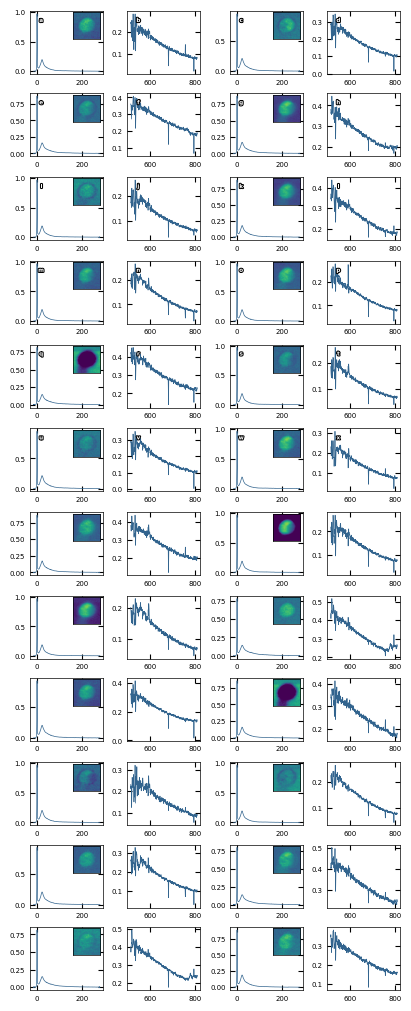

In [27]:
# viz.channels = [0,2,3,4,5,6,7,9,10,11,12,13,14,15,16,18,19,20,23,25,26,27,30,31]
folder_name = "Generated_1D_19"
# viz.model=model1
viz.generator_images_1D(dset,
    folder_name=folder_name,
    figsize=(4,10),
    cbar_number_format="%.02d",
    # shape_=(128,128,128,128),
    divider_=False,
    graph_layout=(len(viz.channels)*dset.eels_chs,4),
    labelfigs_=True
    )

## 2d

In [5]:
model2 = ConvAutoencoder_2D(
            encoder_step_size_2D,
            pooling_list_1D,
            decoder_step_size_2D,
            upsampling_list_2D,
            embedding_size,
            conv_size_2D,
            device,
            attn_heads,
            learning_rate=3e-5,
        )

In [6]:
st = 3
model2.training = True
## TODO: get rid of translation
## TODO: should I add weights for the relative contributions of spectra and diffraction?
for ep in np.arange(0,20):
    model2.Train(
        dset,
        coef_1=(1e-5*ep)//st,
        coef_2=(1e-5*ep)//st,
        epoch_=ep,
        epochs=ep+1,
        with_scheduler=False,
        folder_path="Combined_all_samples_2D",
        batch_size=16, # max 16 on h100
        save_emb_every=100
    )

Epoch: 000/001, getting embedding
.............................
Created empty h5 embedding datasets to fill during training


100%|██████████| 31869/31869 [5:54:57<00:00,  1.50it/s]  


Epoch: 000/001 | Train Loss: 1.4993
.............................


KeyError: "Unable to open object (object 'embedding_temp' doesn't exist)"

In [18]:
check = '(2024-02-20)_epoch:0000_l1coef:0.0000_lr:0.00003_trainloss:1.4993'

h[f'embedding_{check}'] = h[f'embedding_']
h[f'scaleshear_{check}'] = h[f'embedding_']
h[f'rotation_{check}'] = h[f'embedding_'] 
h[f'translation_{check}'] = h[f'embedding_']
model2.embedding = h[f'embedding_{check}']
model2.scale_shear = h[f'scaleshear_{check}']           
model2.rotation = h[f'rotation_{check}']         
model2.translation = h[f'translation_{check}']

In [ ]:
embeddings2 = model2.get_embedding(dset,train=False)

  0%|          | 0/15935 [00:00<?, ?it/s]

100%|██████████| 15935/15935 [22:47<00:00, 11.65it/s]


In [20]:
# instantiates the visualization class
viz = Viz_Multimodal(printer=printing, labelfigs_=True)
viz.scalebar_ = {"width": 250, "scale length": 100, "units": "nm", "channel": -1}

In [22]:
viz.channels = [i for i in range(model2.embedding_size)]
viz.scalebar_ = {"width": 250, "scale length": 100, "units": "nm"}
viz.model = model2
viz.embeddings(
    dset.meta,
    mod=4,
    scalebar_=viz.scalebar_,
    savefolder='emb_2D_epoch_01/')

  0%|          | 0/27 [00:00<?, ?it/s]

100%|██████████| 27/27 [01:48<00:00,  4.02s/it]


In [24]:
# Visualize affine transforms
viz.affines(
    dset.meta,
    scalebar_=viz.scalebar_,
    figsize=(5, 8),
    savefolder='emb_2D_epoch_01/'
    )

100%|██████████| 27/27 [00:45<00:00,  1.67s/it]


In [ ]:
cluster_list,labels = model2.get_clusters(dset,embeddings1,n_components=17,n_clusters=30)                                                                             

In [ ]:
viz.clustered_images(dset,cluster_list,labels,
                     save_folder='clustered_30_epoch_6/',
                     printer = viz.printer)

In [42]:
# folder_name = "Generator_of_epoch_6_all_ch"
# viz.channels = 
model2.generate_range(dset, model2.checkpoint,channels=viz.channels,
                                generator_iters=25,averaging_number=50,
                                overwrite=False)

0 AuCo(02)


100%|██████████| 25/25 [00:21<00:00,  1.18it/s]


1 AuCo(03)


100%|██████████| 25/25 [00:06<00:00,  4.03it/s]


2 AuCo(04)


100%|██████████| 25/25 [00:06<00:00,  4.01it/s]


3 AuCo(05)


100%|██████████| 25/25 [00:06<00:00,  4.01it/s]


4 AuCo(06)


100%|██████████| 25/25 [00:06<00:00,  4.02it/s]


5 AuCo(07)


100%|██████████| 25/25 [00:06<00:00,  3.95it/s]


6 AuCo(08)


100%|██████████| 25/25 [00:06<00:00,  3.96it/s]


7 AuCo(09)


100%|██████████| 25/25 [00:06<00:00,  3.94it/s]


8 AuCo(10)


100%|██████████| 25/25 [00:06<00:00,  3.95it/s]


9 AuCo(11)


100%|██████████| 25/25 [00:06<00:00,  3.96it/s]


10 AuCo(14)


100%|██████████| 25/25 [00:06<00:00,  3.96it/s]


11 AuCo(15)


100%|██████████| 25/25 [00:06<00:00,  3.97it/s]


12 AuCo(16)


100%|██████████| 25/25 [00:06<00:00,  3.97it/s]


13 AuCo(17)


100%|██████████| 25/25 [00:06<00:00,  3.97it/s]


14 AuCo(18)


100%|██████████| 25/25 [00:06<00:00,  3.96it/s]


15 AuCo(19)


100%|██████████| 25/25 [00:06<00:00,  3.96it/s]


16 AuCo(20)


100%|██████████| 25/25 [00:06<00:00,  3.96it/s]


17 AuCo(21)


100%|██████████| 25/25 [00:06<00:00,  3.97it/s]


18 AuCo(22)


100%|██████████| 25/25 [00:06<00:00,  3.97it/s]


19 AuCo(23)


100%|██████████| 25/25 [00:06<00:00,  4.02it/s]


20 AuCo(24)


100%|██████████| 25/25 [00:06<00:00,  3.95it/s]


21 AuCo(25)


100%|██████████| 25/25 [00:06<00:00,  3.95it/s]


22 AuCo(26)


100%|██████████| 25/25 [00:06<00:00,  3.95it/s]


23 AuCo(27)


100%|██████████| 25/25 [00:06<00:00,  3.94it/s]


24 AuCo(28)


100%|██████████| 25/25 [00:06<00:00,  3.95it/s]


25 AuCo(29)


100%|██████████| 25/25 [00:06<00:00,  3.95it/s]


26 AuCo(30)


100%|██████████| 25/25 [00:06<00:00,  3.95it/s]


In [48]:
folder_name = "Generator_2D_ep_1"
viz.channels = [0,5,6,10,12,14,18,19,21,23,25,26,27,28,29,31]
viz.generator_images_2D( dset,
    folder_name=folder_name,
    figsize=(7.5,4),
    cbar_number_format="%.02d",
    # shape_=(128,128,128,128),
    divider_=False,
    graph_layout=(len(viz.channels),4),
    labelfigs_=True
    )

0 AuCo(02)


  0%|          | 0/25 [00:00<?, ?it/s]

no inverse scaling


  4%|▍         | 1/25 [00:03<01:19,  3.30s/it]

no inverse scaling


  8%|▊         | 2/25 [00:07<01:22,  3.59s/it]

no inverse scaling


 12%|█▏        | 3/25 [00:10<01:16,  3.46s/it]

no inverse scaling


 16%|█▌        | 4/25 [00:13<01:11,  3.40s/it]

no inverse scaling


 20%|██        | 5/25 [00:17<01:11,  3.59s/it]

no inverse scaling


 24%|██▍       | 6/25 [00:20<01:06,  3.49s/it]

no inverse scaling


 28%|██▊       | 7/25 [00:24<01:01,  3.43s/it]

no inverse scaling


 32%|███▏      | 8/25 [00:27<00:57,  3.38s/it]

no inverse scaling


 36%|███▌      | 9/25 [00:30<00:53,  3.35s/it]

no inverse scaling


 40%|████      | 10/25 [00:34<00:53,  3.59s/it]

no inverse scaling


 44%|████▍     | 11/25 [00:38<00:48,  3.49s/it]

no inverse scaling


 48%|████▊     | 12/25 [00:41<00:44,  3.43s/it]

no inverse scaling


 52%|█████▏    | 13/25 [00:44<00:40,  3.39s/it]

no inverse scaling


 56%|█████▌    | 14/25 [00:48<00:36,  3.36s/it]

no inverse scaling


 60%|██████    | 15/25 [00:52<00:36,  3.70s/it]

no inverse scaling


 64%|██████▍   | 16/25 [00:55<00:32,  3.58s/it]

no inverse scaling


 68%|██████▊   | 17/25 [00:59<00:27,  3.49s/it]

no inverse scaling


 72%|███████▏  | 18/25 [01:02<00:23,  3.43s/it]

no inverse scaling


 76%|███████▌  | 19/25 [01:05<00:20,  3.39s/it]

no inverse scaling


 80%|████████  | 20/25 [01:09<00:16,  3.37s/it]

no inverse scaling


 84%|████████▍ | 21/25 [01:12<00:13,  3.35s/it]

no inverse scaling


 88%|████████▊ | 22/25 [01:17<00:11,  3.75s/it]

no inverse scaling


 92%|█████████▏| 23/25 [01:20<00:07,  3.62s/it]

no inverse scaling


 96%|█████████▌| 24/25 [01:23<00:03,  3.52s/it]

no inverse scaling


100%|██████████| 25/25 [01:26<00:00,  3.48s/it]


1 AuCo(03)


  0%|          | 0/25 [00:00<?, ?it/s]

no inverse scaling


  4%|▍         | 1/25 [00:03<01:18,  3.28s/it]

no inverse scaling


  8%|▊         | 2/25 [00:06<01:16,  3.30s/it]

no inverse scaling


 12%|█▏        | 3/25 [00:09<01:12,  3.29s/it]

no inverse scaling


 16%|█▌        | 4/25 [00:13<01:08,  3.28s/it]

no inverse scaling


 20%|██        | 5/25 [00:18<01:18,  3.95s/it]

no inverse scaling


 24%|██▍       | 6/25 [00:21<01:10,  3.72s/it]

no inverse scaling


 28%|██▊       | 7/25 [00:24<01:04,  3.57s/it]

no inverse scaling


 32%|███▏      | 8/25 [00:28<00:59,  3.47s/it]

no inverse scaling


 36%|███▌      | 9/25 [00:31<00:54,  3.41s/it]

no inverse scaling


 40%|████      | 10/25 [00:34<00:50,  3.37s/it]

no inverse scaling


 44%|████▍     | 11/25 [00:37<00:46,  3.33s/it]

no inverse scaling


 48%|████▊     | 12/25 [00:41<00:43,  3.32s/it]

no inverse scaling


 52%|█████▏    | 13/25 [00:44<00:39,  3.31s/it]

no inverse scaling


 56%|█████▌    | 14/25 [00:47<00:36,  3.30s/it]

no inverse scaling


 60%|██████    | 15/25 [00:53<00:39,  3.95s/it]

no inverse scaling


 64%|██████▍   | 16/25 [00:56<00:33,  3.76s/it]

no inverse scaling


 68%|██████▊   | 17/25 [00:59<00:28,  3.61s/it]

no inverse scaling


 72%|███████▏  | 18/25 [01:03<00:24,  3.51s/it]

no inverse scaling


 76%|███████▌  | 19/25 [01:06<00:20,  3.44s/it]

no inverse scaling


 80%|████████  | 20/25 [01:09<00:16,  3.40s/it]

no inverse scaling


 84%|████████▍ | 21/25 [01:12<00:13,  3.36s/it]

no inverse scaling


 88%|████████▊ | 22/25 [01:16<00:10,  3.34s/it]

no inverse scaling


 92%|█████████▏| 23/25 [01:19<00:06,  3.33s/it]

no inverse scaling


 96%|█████████▌| 24/25 [01:22<00:03,  3.31s/it]

no inverse scaling


100%|██████████| 25/25 [01:26<00:00,  3.44s/it]


2 AuCo(04)


  0%|          | 0/25 [00:00<?, ?it/s]

no inverse scaling


  4%|▍         | 1/25 [00:03<01:18,  3.27s/it]

no inverse scaling


  8%|▊         | 2/25 [00:06<01:15,  3.30s/it]

no inverse scaling


 12%|█▏        | 3/25 [00:12<01:40,  4.57s/it]

no inverse scaling


 16%|█▌        | 4/25 [00:15<01:25,  4.07s/it]

no inverse scaling


 20%|██        | 5/25 [00:19<01:15,  3.78s/it]

no inverse scaling


 24%|██▍       | 6/25 [00:22<01:08,  3.60s/it]

no inverse scaling


 28%|██▊       | 7/25 [00:25<01:02,  3.48s/it]

no inverse scaling


 32%|███▏      | 8/25 [00:28<00:57,  3.41s/it]

no inverse scaling


 36%|███▌      | 9/25 [00:32<00:53,  3.36s/it]

no inverse scaling


 40%|████      | 10/25 [00:35<00:50,  3.34s/it]

no inverse scaling


 44%|████▍     | 11/25 [00:38<00:46,  3.31s/it]

no inverse scaling


 48%|████▊     | 12/25 [00:42<00:42,  3.30s/it]

no inverse scaling


 52%|█████▏    | 13/25 [00:45<00:39,  3.30s/it]

no inverse scaling


 56%|█████▌    | 14/25 [00:48<00:36,  3.29s/it]

no inverse scaling


 60%|██████    | 15/25 [00:51<00:32,  3.29s/it]

no inverse scaling


 64%|██████▍   | 16/25 [00:55<00:29,  3.29s/it]

no inverse scaling


 68%|██████▊   | 17/25 [00:58<00:26,  3.28s/it]

no inverse scaling


 72%|███████▏  | 18/25 [01:01<00:22,  3.29s/it]

no inverse scaling


 76%|███████▌  | 19/25 [01:08<00:26,  4.34s/it]

no inverse scaling


 80%|████████  | 20/25 [01:11<00:20,  4.03s/it]

no inverse scaling


 84%|████████▍ | 21/25 [01:15<00:15,  3.80s/it]

no inverse scaling


 88%|████████▊ | 22/25 [01:18<00:10,  3.65s/it]

no inverse scaling


 92%|█████████▏| 23/25 [01:21<00:07,  3.54s/it]

no inverse scaling


 96%|█████████▌| 24/25 [01:24<00:03,  3.46s/it]

no inverse scaling


100%|██████████| 25/25 [01:28<00:00,  3.53s/it]


3 AuCo(05)


  0%|          | 0/25 [00:00<?, ?it/s]

no inverse scaling


  4%|▍         | 1/25 [00:03<01:18,  3.29s/it]

no inverse scaling


  8%|▊         | 2/25 [00:06<01:15,  3.30s/it]

no inverse scaling


 12%|█▏        | 3/25 [00:09<01:12,  3.30s/it]

no inverse scaling


 16%|█▌        | 4/25 [00:13<01:09,  3.30s/it]

no inverse scaling


 20%|██        | 5/25 [00:16<01:05,  3.29s/it]

no inverse scaling


 24%|██▍       | 6/25 [00:19<01:02,  3.28s/it]

no inverse scaling


 28%|██▊       | 7/25 [00:23<00:59,  3.28s/it]

no inverse scaling


 32%|███▏      | 8/25 [00:26<00:55,  3.28s/it]

no inverse scaling


 36%|███▌      | 9/25 [00:29<00:52,  3.29s/it]

no inverse scaling


 40%|████      | 10/25 [00:32<00:49,  3.28s/it]

no inverse scaling


 44%|████▍     | 11/25 [00:36<00:45,  3.28s/it]

no inverse scaling


 48%|████▊     | 12/25 [00:39<00:42,  3.28s/it]

no inverse scaling


 52%|█████▏    | 13/25 [00:42<00:39,  3.28s/it]

no inverse scaling


 56%|█████▌    | 14/25 [00:50<00:50,  4.62s/it]

no inverse scaling


 60%|██████    | 15/25 [00:53<00:42,  4.22s/it]

no inverse scaling


 64%|██████▍   | 16/25 [00:56<00:35,  3.93s/it]

no inverse scaling


 68%|██████▊   | 17/25 [01:00<00:29,  3.74s/it]

no inverse scaling


 72%|███████▏  | 18/25 [01:03<00:25,  3.60s/it]

no inverse scaling


 76%|███████▌  | 19/25 [01:06<00:21,  3.51s/it]

no inverse scaling


 80%|████████  | 20/25 [01:10<00:17,  3.45s/it]

no inverse scaling


 84%|████████▍ | 21/25 [01:13<00:13,  3.40s/it]

no inverse scaling


 88%|████████▊ | 22/25 [01:16<00:10,  3.37s/it]

no inverse scaling


 92%|█████████▏| 23/25 [01:20<00:06,  3.35s/it]

no inverse scaling


 96%|█████████▌| 24/25 [01:23<00:03,  3.33s/it]

no inverse scaling


100%|██████████| 25/25 [01:26<00:00,  3.47s/it]


4 AuCo(06)


  0%|          | 0/25 [00:00<?, ?it/s]

no inverse scaling


  4%|▍         | 1/25 [00:03<01:18,  3.28s/it]

no inverse scaling


  8%|▊         | 2/25 [00:06<01:15,  3.30s/it]

no inverse scaling


 12%|█▏        | 3/25 [00:09<01:12,  3.29s/it]

no inverse scaling


 16%|█▌        | 4/25 [00:13<01:09,  3.29s/it]

no inverse scaling


 20%|██        | 5/25 [00:16<01:05,  3.28s/it]

no inverse scaling


 24%|██▍       | 6/25 [00:19<01:02,  3.28s/it]

no inverse scaling


 28%|██▊       | 7/25 [00:22<00:58,  3.27s/it]

no inverse scaling


 32%|███▏      | 8/25 [00:26<00:55,  3.27s/it]

no inverse scaling


 36%|███▌      | 9/25 [00:29<00:52,  3.28s/it]

no inverse scaling


 40%|████      | 10/25 [00:32<00:49,  3.27s/it]

no inverse scaling


 44%|████▍     | 11/25 [00:36<00:45,  3.28s/it]

no inverse scaling


 48%|████▊     | 12/25 [00:39<00:42,  3.28s/it]

no inverse scaling


 52%|█████▏    | 13/25 [00:48<00:59,  4.93s/it]

no inverse scaling


 56%|█████▌    | 14/25 [00:51<00:48,  4.43s/it]

no inverse scaling


 60%|██████    | 15/25 [00:54<00:40,  4.09s/it]

no inverse scaling


 64%|██████▍   | 16/25 [00:57<00:34,  3.85s/it]

no inverse scaling


 68%|██████▊   | 17/25 [01:01<00:29,  3.68s/it]

no inverse scaling


 72%|███████▏  | 18/25 [01:04<00:24,  3.56s/it]

no inverse scaling


 76%|███████▌  | 19/25 [01:07<00:20,  3.48s/it]

no inverse scaling


 80%|████████  | 20/25 [01:11<00:17,  3.43s/it]

no inverse scaling


 84%|████████▍ | 21/25 [01:14<00:13,  3.39s/it]

no inverse scaling


 88%|████████▊ | 22/25 [01:17<00:10,  3.36s/it]

no inverse scaling


 92%|█████████▏| 23/25 [01:21<00:06,  3.34s/it]

no inverse scaling


 96%|█████████▌| 24/25 [01:24<00:03,  3.32s/it]

no inverse scaling


100%|██████████| 25/25 [01:27<00:00,  3.50s/it]


5 AuCo(07)


  0%|          | 0/25 [00:00<?, ?it/s]

no inverse scaling


  4%|▍         | 1/25 [00:03<01:19,  3.31s/it]

no inverse scaling


  8%|▊         | 2/25 [00:06<01:16,  3.30s/it]

no inverse scaling


 12%|█▏        | 3/25 [00:09<01:12,  3.29s/it]

no inverse scaling


 16%|█▌        | 4/25 [00:13<01:09,  3.29s/it]

no inverse scaling


 20%|██        | 5/25 [00:16<01:05,  3.28s/it]

no inverse scaling


 24%|██▍       | 6/25 [00:19<01:02,  3.27s/it]

no inverse scaling


 28%|██▊       | 7/25 [00:22<00:58,  3.27s/it]

no inverse scaling


 32%|███▏      | 8/25 [00:26<00:55,  3.27s/it]

no inverse scaling


 36%|███▌      | 9/25 [00:29<00:52,  3.28s/it]

no inverse scaling


 40%|████      | 10/25 [00:32<00:49,  3.27s/it]

no inverse scaling


 44%|████▍     | 11/25 [00:36<00:45,  3.27s/it]

no inverse scaling


 48%|████▊     | 12/25 [00:39<00:42,  3.28s/it]

no inverse scaling


 52%|█████▏    | 13/25 [00:42<00:39,  3.27s/it]

no inverse scaling


 56%|█████▌    | 14/25 [00:45<00:36,  3.28s/it]

no inverse scaling


 60%|██████    | 15/25 [00:49<00:32,  3.28s/it]

no inverse scaling


 64%|██████▍   | 16/25 [00:52<00:29,  3.27s/it]

no inverse scaling


 68%|██████▊   | 17/25 [00:55<00:26,  3.27s/it]

no inverse scaling


 72%|███████▏  | 18/25 [00:58<00:22,  3.27s/it]

no inverse scaling


 76%|███████▌  | 19/25 [01:09<00:31,  5.33s/it]

no inverse scaling


 80%|████████  | 20/25 [01:12<00:23,  4.72s/it]

no inverse scaling


 84%|████████▍ | 21/25 [01:15<00:17,  4.29s/it]

no inverse scaling


 88%|████████▊ | 22/25 [01:18<00:11,  3.99s/it]

no inverse scaling


 92%|█████████▏| 23/25 [01:22<00:07,  3.78s/it]

no inverse scaling


 96%|█████████▌| 24/25 [01:25<00:03,  3.64s/it]

no inverse scaling


100%|██████████| 25/25 [01:28<00:00,  3.55s/it]


6 AuCo(08)


  0%|          | 0/25 [00:00<?, ?it/s]

no inverse scaling


  4%|▍         | 1/25 [00:03<01:19,  3.30s/it]

no inverse scaling


  8%|▊         | 2/25 [00:06<01:16,  3.31s/it]

no inverse scaling


 12%|█▏        | 3/25 [00:09<01:12,  3.30s/it]

no inverse scaling


 16%|█▌        | 4/25 [00:13<01:09,  3.29s/it]

no inverse scaling


 20%|██        | 5/25 [00:16<01:05,  3.28s/it]

no inverse scaling


 24%|██▍       | 6/25 [00:19<01:02,  3.28s/it]

no inverse scaling


 28%|██▊       | 7/25 [00:22<00:58,  3.28s/it]

no inverse scaling


 32%|███▏      | 8/25 [00:26<00:55,  3.27s/it]

no inverse scaling


 36%|███▌      | 9/25 [00:29<00:52,  3.28s/it]

no inverse scaling


 40%|████      | 10/25 [00:32<00:49,  3.27s/it]

no inverse scaling


 44%|████▍     | 11/25 [00:36<00:45,  3.27s/it]

no inverse scaling


 48%|████▊     | 12/25 [00:39<00:42,  3.27s/it]

no inverse scaling


 52%|█████▏    | 13/25 [00:42<00:39,  3.28s/it]

no inverse scaling


 56%|█████▌    | 14/25 [00:45<00:36,  3.27s/it]

no inverse scaling


 60%|██████    | 15/25 [00:49<00:32,  3.28s/it]

no inverse scaling


 64%|██████▍   | 16/25 [00:52<00:29,  3.28s/it]

no inverse scaling


 68%|██████▊   | 17/25 [00:55<00:26,  3.28s/it]

no inverse scaling


 72%|███████▏  | 18/25 [00:59<00:22,  3.28s/it]

no inverse scaling


 76%|███████▌  | 19/25 [01:02<00:19,  3.29s/it]

no inverse scaling


 80%|████████  | 20/25 [01:05<00:16,  3.29s/it]

no inverse scaling


 84%|████████▍ | 21/25 [01:08<00:13,  3.29s/it]

no inverse scaling


 88%|████████▊ | 22/25 [01:12<00:09,  3.29s/it]

no inverse scaling


 92%|█████████▏| 23/25 [01:15<00:06,  3.30s/it]

no inverse scaling


 96%|█████████▌| 24/25 [01:18<00:03,  3.30s/it]

no inverse scaling


100%|██████████| 25/25 [01:22<00:00,  3.29s/it]


7 AuCo(09)


  0%|          | 0/25 [00:00<?, ?it/s]

no inverse scaling


  4%|▍         | 1/25 [00:03<01:18,  3.26s/it]

no inverse scaling


  8%|▊         | 2/25 [00:06<01:15,  3.29s/it]

no inverse scaling


 12%|█▏        | 3/25 [00:09<01:12,  3.28s/it]

no inverse scaling


 16%|█▌        | 4/25 [00:13<01:08,  3.28s/it]

no inverse scaling


 20%|██        | 5/25 [00:16<01:05,  3.29s/it]

no inverse scaling


 24%|██▍       | 6/25 [00:19<01:02,  3.28s/it]

no inverse scaling


 28%|██▊       | 7/25 [00:31<01:49,  6.09s/it]

no inverse scaling


 32%|███▏      | 8/25 [00:34<01:28,  5.20s/it]

no inverse scaling


 36%|███▌      | 9/25 [00:38<01:13,  4.61s/it]

no inverse scaling


 40%|████      | 10/25 [00:41<01:03,  4.20s/it]

no inverse scaling


 44%|████▍     | 11/25 [00:44<00:54,  3.93s/it]

no inverse scaling


 48%|████▊     | 12/25 [00:48<00:48,  3.74s/it]

no inverse scaling


 52%|█████▏    | 13/25 [00:51<00:43,  3.61s/it]

no inverse scaling


 56%|█████▌    | 14/25 [00:54<00:38,  3.52s/it]

no inverse scaling


 60%|██████    | 15/25 [00:57<00:34,  3.46s/it]

no inverse scaling


 64%|██████▍   | 16/25 [01:01<00:30,  3.40s/it]

no inverse scaling


 68%|██████▊   | 17/25 [01:04<00:27,  3.38s/it]

no inverse scaling


 72%|███████▏  | 18/25 [01:07<00:23,  3.36s/it]

no inverse scaling


 76%|███████▌  | 19/25 [01:11<00:20,  3.35s/it]

no inverse scaling


 80%|████████  | 20/25 [01:14<00:16,  3.35s/it]

no inverse scaling


 84%|████████▍ | 21/25 [01:17<00:13,  3.34s/it]

no inverse scaling


 88%|████████▊ | 22/25 [01:21<00:10,  3.34s/it]

no inverse scaling


 92%|█████████▏| 23/25 [01:24<00:06,  3.33s/it]

no inverse scaling


 96%|█████████▌| 24/25 [01:27<00:03,  3.32s/it]

no inverse scaling


100%|██████████| 25/25 [01:31<00:00,  3.65s/it]


8 AuCo(10)


  0%|          | 0/25 [00:00<?, ?it/s]

no inverse scaling


  4%|▍         | 1/25 [00:03<01:22,  3.45s/it]

no inverse scaling


  8%|▊         | 2/25 [00:06<01:19,  3.46s/it]

no inverse scaling


 12%|█▏        | 3/25 [00:10<01:15,  3.44s/it]

no inverse scaling


 16%|█▌        | 4/25 [00:13<01:13,  3.51s/it]

no inverse scaling


 20%|██        | 5/25 [00:17<01:09,  3.46s/it]

no inverse scaling


 24%|██▍       | 6/25 [00:20<01:04,  3.42s/it]

no inverse scaling


 28%|██▊       | 7/25 [00:24<01:02,  3.48s/it]

no inverse scaling


 32%|███▏      | 8/25 [00:27<00:59,  3.47s/it]

no inverse scaling


 36%|███▌      | 9/25 [00:31<00:55,  3.46s/it]

no inverse scaling


 40%|████      | 10/25 [00:34<00:51,  3.46s/it]

no inverse scaling


 44%|████▍     | 11/25 [00:38<00:48,  3.45s/it]

no inverse scaling


 48%|████▊     | 12/25 [00:41<00:44,  3.44s/it]

no inverse scaling


 52%|█████▏    | 13/25 [00:44<00:41,  3.44s/it]

no inverse scaling


 56%|█████▌    | 14/25 [00:48<00:38,  3.50s/it]

no inverse scaling


 60%|██████    | 15/25 [00:51<00:34,  3.49s/it]

no inverse scaling


 64%|██████▍   | 16/25 [00:55<00:31,  3.47s/it]

no inverse scaling


 68%|██████▊   | 17/25 [00:59<00:28,  3.53s/it]

no inverse scaling


 72%|███████▏  | 18/25 [01:02<00:24,  3.49s/it]

no inverse scaling


 76%|███████▌  | 19/25 [01:05<00:20,  3.46s/it]

no inverse scaling


 80%|████████  | 20/25 [01:09<00:17,  3.45s/it]

no inverse scaling


 84%|████████▍ | 21/25 [01:12<00:13,  3.44s/it]

no inverse scaling


 88%|████████▊ | 22/25 [01:16<00:10,  3.42s/it]

no inverse scaling


 92%|█████████▏| 23/25 [01:19<00:06,  3.42s/it]

no inverse scaling


 96%|█████████▌| 24/25 [01:23<00:03,  3.45s/it]

no inverse scaling


100%|██████████| 25/25 [01:26<00:00,  3.47s/it]


9 AuCo(11)


  0%|          | 0/25 [00:00<?, ?it/s]

no inverse scaling


  4%|▍         | 1/25 [00:03<01:23,  3.46s/it]

no inverse scaling


  8%|▊         | 2/25 [00:06<01:19,  3.47s/it]

no inverse scaling


 12%|█▏        | 3/25 [00:10<01:15,  3.45s/it]

no inverse scaling


 16%|█▌        | 4/25 [00:13<01:12,  3.43s/it]

no inverse scaling


 20%|██        | 5/25 [00:27<02:25,  7.30s/it]

no inverse scaling


 24%|██▍       | 6/25 [00:31<01:54,  6.00s/it]

no inverse scaling


 28%|██▊       | 7/25 [00:34<01:32,  5.16s/it]

no inverse scaling


 32%|███▏      | 8/25 [00:38<01:19,  4.65s/it]

no inverse scaling


 36%|███▌      | 9/25 [00:41<01:08,  4.26s/it]

no inverse scaling


 40%|████      | 10/25 [00:45<01:00,  4.03s/it]

no inverse scaling


 44%|████▍     | 11/25 [00:48<00:53,  3.83s/it]

no inverse scaling


 48%|████▊     | 12/25 [00:52<00:48,  3.70s/it]

no inverse scaling


 52%|█████▏    | 13/25 [00:55<00:43,  3.64s/it]

no inverse scaling


 56%|█████▌    | 14/25 [00:59<00:39,  3.59s/it]

no inverse scaling


 60%|██████    | 15/25 [01:02<00:36,  3.61s/it]

no inverse scaling


 64%|██████▍   | 16/25 [01:06<00:31,  3.54s/it]

no inverse scaling


 68%|██████▊   | 17/25 [01:09<00:28,  3.55s/it]

no inverse scaling


 72%|███████▏  | 18/25 [01:13<00:24,  3.53s/it]

no inverse scaling


 76%|███████▌  | 19/25 [01:16<00:21,  3.50s/it]

no inverse scaling


 80%|████████  | 20/25 [01:20<00:17,  3.48s/it]

no inverse scaling


 84%|████████▍ | 21/25 [01:23<00:13,  3.46s/it]

no inverse scaling


 88%|████████▊ | 22/25 [01:26<00:10,  3.44s/it]

no inverse scaling


 92%|█████████▏| 23/25 [01:30<00:06,  3.45s/it]

no inverse scaling


 96%|█████████▌| 24/25 [01:34<00:03,  3.54s/it]

no inverse scaling


100%|██████████| 25/25 [01:37<00:00,  3.90s/it]


10 AuCo(14)


  0%|          | 0/25 [00:00<?, ?it/s]

no inverse scaling


  4%|▍         | 1/25 [00:03<01:25,  3.55s/it]

no inverse scaling


  8%|▊         | 2/25 [00:07<01:20,  3.49s/it]

no inverse scaling


 12%|█▏        | 3/25 [00:10<01:15,  3.45s/it]

no inverse scaling


 16%|█▌        | 4/25 [00:14<01:13,  3.51s/it]

no inverse scaling


 20%|██        | 5/25 [00:17<01:09,  3.48s/it]

no inverse scaling


 24%|██▍       | 6/25 [00:20<01:05,  3.45s/it]

no inverse scaling


 28%|██▊       | 7/25 [00:24<01:03,  3.50s/it]

no inverse scaling


 32%|███▏      | 8/25 [00:27<00:58,  3.47s/it]

no inverse scaling


 36%|███▌      | 9/25 [00:31<00:54,  3.43s/it]

no inverse scaling


 40%|████      | 10/25 [00:34<00:51,  3.43s/it]

no inverse scaling


 44%|████▍     | 11/25 [00:38<00:47,  3.42s/it]

no inverse scaling


 48%|████▊     | 12/25 [00:41<00:44,  3.40s/it]

no inverse scaling


 52%|█████▏    | 13/25 [00:44<00:40,  3.42s/it]

no inverse scaling


 56%|█████▌    | 14/25 [00:48<00:37,  3.44s/it]

no inverse scaling


 60%|██████    | 15/25 [00:51<00:34,  3.45s/it]

no inverse scaling


 64%|██████▍   | 16/25 [00:55<00:31,  3.48s/it]

no inverse scaling


 68%|██████▊   | 17/25 [00:58<00:27,  3.46s/it]

no inverse scaling


 72%|███████▏  | 18/25 [01:02<00:24,  3.45s/it]

no inverse scaling


 76%|███████▌  | 19/25 [01:05<00:20,  3.43s/it]

no inverse scaling


 80%|████████  | 20/25 [01:08<00:17,  3.43s/it]

no inverse scaling


 84%|████████▍ | 21/25 [01:12<00:13,  3.45s/it]

no inverse scaling


 88%|████████▊ | 22/25 [01:15<00:10,  3.45s/it]

no inverse scaling


 92%|█████████▏| 23/25 [01:19<00:06,  3.45s/it]

no inverse scaling


 96%|█████████▌| 24/25 [01:23<00:03,  3.52s/it]

no inverse scaling


100%|██████████| 25/25 [01:26<00:00,  3.46s/it]


11 AuCo(15)


  0%|          | 0/25 [00:00<?, ?it/s]

no inverse scaling


  4%|▍         | 1/25 [00:03<01:27,  3.64s/it]

no inverse scaling


  8%|▊         | 2/25 [00:07<01:21,  3.54s/it]

no inverse scaling


 12%|█▏        | 3/25 [00:10<01:15,  3.42s/it]

no inverse scaling


 16%|█▌        | 4/25 [00:13<01:12,  3.44s/it]

no inverse scaling


 20%|██        | 5/25 [00:17<01:08,  3.40s/it]

no inverse scaling


 24%|██▍       | 6/25 [00:20<01:04,  3.38s/it]

no inverse scaling


 28%|██▊       | 7/25 [00:23<01:00,  3.36s/it]

no inverse scaling


 32%|███▏      | 8/25 [00:27<00:56,  3.34s/it]

no inverse scaling


 36%|███▌      | 9/25 [00:30<00:53,  3.33s/it]

no inverse scaling


 40%|████      | 10/25 [00:33<00:49,  3.32s/it]

no inverse scaling


 44%|████▍     | 11/25 [00:37<00:46,  3.34s/it]

no inverse scaling


 48%|████▊     | 12/25 [00:40<00:43,  3.35s/it]

no inverse scaling


 52%|█████▏    | 13/25 [00:43<00:40,  3.38s/it]

no inverse scaling


 56%|█████▌    | 14/25 [01:00<01:21,  7.43s/it]

no inverse scaling


 60%|██████    | 15/25 [01:04<01:02,  6.24s/it]

no inverse scaling


 64%|██████▍   | 16/25 [01:07<00:48,  5.40s/it]

no inverse scaling


 68%|██████▊   | 17/25 [01:10<00:38,  4.77s/it]

no inverse scaling


 72%|███████▏  | 18/25 [01:14<00:30,  4.35s/it]

no inverse scaling


 76%|███████▌  | 19/25 [01:17<00:24,  4.05s/it]

no inverse scaling


 80%|████████  | 20/25 [01:21<00:19,  3.88s/it]

no inverse scaling


 84%|████████▍ | 21/25 [01:24<00:14,  3.70s/it]

no inverse scaling


 88%|████████▊ | 22/25 [01:27<00:10,  3.60s/it]

no inverse scaling


 92%|█████████▏| 23/25 [01:31<00:07,  3.56s/it]

no inverse scaling


 96%|█████████▌| 24/25 [01:34<00:03,  3.51s/it]

no inverse scaling


100%|██████████| 25/25 [01:37<00:00,  3.92s/it]


12 AuCo(16)


  0%|          | 0/25 [00:00<?, ?it/s]

no inverse scaling


  4%|▍         | 1/25 [00:03<01:26,  3.62s/it]

no inverse scaling


  8%|▊         | 2/25 [00:06<01:19,  3.46s/it]

no inverse scaling


 12%|█▏        | 3/25 [00:10<01:14,  3.37s/it]

no inverse scaling


 16%|█▌        | 4/25 [00:13<01:10,  3.33s/it]

no inverse scaling


 20%|██        | 5/25 [00:16<01:06,  3.31s/it]

no inverse scaling


 24%|██▍       | 6/25 [00:20<01:02,  3.29s/it]

no inverse scaling


 28%|██▊       | 7/25 [00:23<00:59,  3.28s/it]

no inverse scaling


 32%|███▏      | 8/25 [00:26<00:55,  3.28s/it]

no inverse scaling


 36%|███▌      | 9/25 [00:29<00:52,  3.27s/it]

no inverse scaling


 40%|████      | 10/25 [00:33<00:49,  3.27s/it]

no inverse scaling


 44%|████▍     | 11/25 [00:36<00:45,  3.27s/it]

no inverse scaling


 48%|████▊     | 12/25 [00:39<00:42,  3.27s/it]

no inverse scaling


 52%|█████▏    | 13/25 [00:42<00:39,  3.27s/it]

no inverse scaling


 56%|█████▌    | 14/25 [00:46<00:35,  3.26s/it]

no inverse scaling


 60%|██████    | 15/25 [00:49<00:32,  3.27s/it]

no inverse scaling


 64%|██████▍   | 16/25 [00:52<00:29,  3.27s/it]

no inverse scaling


 68%|██████▊   | 17/25 [00:55<00:26,  3.27s/it]

no inverse scaling


 72%|███████▏  | 18/25 [00:59<00:22,  3.27s/it]

no inverse scaling


 76%|███████▌  | 19/25 [01:02<00:19,  3.28s/it]

no inverse scaling


 80%|████████  | 20/25 [01:05<00:16,  3.27s/it]

no inverse scaling


 84%|████████▍ | 21/25 [01:09<00:13,  3.28s/it]

no inverse scaling


 88%|████████▊ | 22/25 [01:12<00:09,  3.27s/it]

no inverse scaling


 92%|█████████▏| 23/25 [01:15<00:06,  3.27s/it]

no inverse scaling


 96%|█████████▌| 24/25 [01:18<00:03,  3.28s/it]

no inverse scaling


100%|██████████| 25/25 [01:22<00:00,  3.29s/it]


13 AuCo(17)


  0%|          | 0/25 [00:00<?, ?it/s]

no inverse scaling


  4%|▍         | 1/25 [00:03<01:26,  3.59s/it]

no inverse scaling


  8%|▊         | 2/25 [00:07<01:21,  3.53s/it]

no inverse scaling


 12%|█▏        | 3/25 [00:10<01:14,  3.41s/it]

no inverse scaling


 16%|█▌        | 4/25 [00:13<01:10,  3.35s/it]

no inverse scaling


 20%|██        | 5/25 [00:16<01:06,  3.33s/it]

no inverse scaling


 24%|██▍       | 6/25 [00:20<01:02,  3.30s/it]

no inverse scaling


 28%|██▊       | 7/25 [00:23<00:59,  3.30s/it]

no inverse scaling


 32%|███▏      | 8/25 [00:26<00:55,  3.29s/it]

no inverse scaling


 36%|███▌      | 9/25 [00:29<00:52,  3.28s/it]

no inverse scaling


 40%|████      | 10/25 [00:33<00:49,  3.28s/it]

no inverse scaling


 44%|████▍     | 11/25 [00:36<00:45,  3.27s/it]

no inverse scaling


 48%|████▊     | 12/25 [00:39<00:42,  3.27s/it]

no inverse scaling


 52%|█████▏    | 13/25 [00:42<00:39,  3.26s/it]

no inverse scaling


 56%|█████▌    | 14/25 [00:46<00:35,  3.26s/it]

no inverse scaling


 60%|██████    | 15/25 [00:49<00:32,  3.27s/it]

no inverse scaling


 64%|██████▍   | 16/25 [00:52<00:29,  3.26s/it]

no inverse scaling


 68%|██████▊   | 17/25 [00:56<00:26,  3.26s/it]

no inverse scaling


 72%|███████▏  | 18/25 [00:59<00:22,  3.26s/it]

no inverse scaling


 76%|███████▌  | 19/25 [01:02<00:19,  3.27s/it]

no inverse scaling


 80%|████████  | 20/25 [01:05<00:16,  3.27s/it]

no inverse scaling


 84%|████████▍ | 21/25 [01:09<00:13,  3.27s/it]

no inverse scaling


 88%|████████▊ | 22/25 [01:12<00:09,  3.28s/it]

no inverse scaling


 92%|█████████▏| 23/25 [01:15<00:06,  3.28s/it]

no inverse scaling


 96%|█████████▌| 24/25 [01:18<00:03,  3.28s/it]

no inverse scaling


100%|██████████| 25/25 [01:22<00:00,  3.29s/it]


14 AuCo(18)


  0%|          | 0/25 [00:00<?, ?it/s]

no inverse scaling


  4%|▍         | 1/25 [00:03<01:26,  3.62s/it]

no inverse scaling


  8%|▊         | 2/25 [00:07<01:21,  3.54s/it]

no inverse scaling


 12%|█▏        | 3/25 [00:10<01:15,  3.42s/it]

no inverse scaling


 16%|█▌        | 4/25 [00:13<01:10,  3.37s/it]

no inverse scaling


 20%|██        | 5/25 [00:16<01:06,  3.34s/it]

no inverse scaling


 24%|██▍       | 6/25 [00:20<01:03,  3.32s/it]

no inverse scaling


 28%|██▊       | 7/25 [00:23<00:59,  3.31s/it]

no inverse scaling


 32%|███▏      | 8/25 [00:26<00:56,  3.30s/it]

no inverse scaling


 36%|███▌      | 9/25 [00:30<00:52,  3.29s/it]

no inverse scaling


 40%|████      | 10/25 [00:33<00:49,  3.29s/it]

no inverse scaling


 44%|████▍     | 11/25 [00:36<00:45,  3.28s/it]

no inverse scaling


 48%|████▊     | 12/25 [00:39<00:42,  3.29s/it]

no inverse scaling


 52%|█████▏    | 13/25 [00:59<01:39,  8.32s/it]

no inverse scaling


 56%|█████▌    | 14/25 [01:03<01:14,  6.80s/it]

no inverse scaling


 60%|██████    | 15/25 [01:06<00:57,  5.74s/it]

no inverse scaling


 64%|██████▍   | 16/25 [01:09<00:45,  5.00s/it]

no inverse scaling


 68%|██████▊   | 17/25 [01:12<00:35,  4.48s/it]

no inverse scaling


 72%|███████▏  | 18/25 [01:16<00:28,  4.12s/it]

no inverse scaling


 76%|███████▌  | 19/25 [01:19<00:23,  3.87s/it]

no inverse scaling


 80%|████████  | 20/25 [01:22<00:18,  3.71s/it]

no inverse scaling


 84%|████████▍ | 21/25 [01:26<00:14,  3.58s/it]

no inverse scaling


 88%|████████▊ | 22/25 [01:29<00:10,  3.49s/it]

no inverse scaling


 92%|█████████▏| 23/25 [01:32<00:06,  3.43s/it]

no inverse scaling


 96%|█████████▌| 24/25 [01:36<00:03,  3.39s/it]

no inverse scaling


100%|██████████| 25/25 [01:39<00:00,  3.98s/it]


15 AuCo(19)


  0%|          | 0/25 [00:00<?, ?it/s]

no inverse scaling


  4%|▍         | 1/25 [00:03<01:27,  3.63s/it]

no inverse scaling


  8%|▊         | 2/25 [00:07<01:22,  3.59s/it]

no inverse scaling


 12%|█▏        | 3/25 [00:10<01:16,  3.46s/it]

no inverse scaling


 16%|█▌        | 4/25 [00:13<01:11,  3.39s/it]

no inverse scaling


 20%|██        | 5/25 [00:17<01:07,  3.35s/it]

no inverse scaling


 24%|██▍       | 6/25 [00:20<01:03,  3.32s/it]

no inverse scaling


 28%|██▊       | 7/25 [00:23<00:59,  3.31s/it]

no inverse scaling


 32%|███▏      | 8/25 [00:26<00:56,  3.31s/it]

no inverse scaling


 36%|███▌      | 9/25 [00:30<00:52,  3.31s/it]

no inverse scaling


 40%|████      | 10/25 [00:33<00:49,  3.29s/it]

no inverse scaling


 44%|████▍     | 11/25 [00:36<00:45,  3.29s/it]

no inverse scaling


 48%|████▊     | 12/25 [00:40<00:42,  3.29s/it]

no inverse scaling


 52%|█████▏    | 13/25 [00:43<00:39,  3.29s/it]

no inverse scaling


 56%|█████▌    | 14/25 [00:46<00:36,  3.29s/it]

no inverse scaling


 60%|██████    | 15/25 [00:49<00:32,  3.29s/it]

no inverse scaling


 64%|██████▍   | 16/25 [00:53<00:29,  3.29s/it]

no inverse scaling


 68%|██████▊   | 17/25 [00:56<00:26,  3.28s/it]

no inverse scaling


 72%|███████▏  | 18/25 [00:59<00:23,  3.29s/it]

no inverse scaling


 76%|███████▌  | 19/25 [01:03<00:19,  3.29s/it]

no inverse scaling


 80%|████████  | 20/25 [01:06<00:16,  3.29s/it]

no inverse scaling


 84%|████████▍ | 21/25 [01:09<00:13,  3.29s/it]

no inverse scaling


 88%|████████▊ | 22/25 [01:12<00:09,  3.30s/it]

no inverse scaling


 92%|█████████▏| 23/25 [01:16<00:06,  3.30s/it]

no inverse scaling


 96%|█████████▌| 24/25 [01:19<00:03,  3.29s/it]

no inverse scaling


100%|██████████| 25/25 [01:22<00:00,  3.31s/it]


16 AuCo(20)


  0%|          | 0/25 [00:00<?, ?it/s]

no inverse scaling


  4%|▍         | 1/25 [00:03<01:27,  3.63s/it]

no inverse scaling


  8%|▊         | 2/25 [00:07<01:21,  3.53s/it]

no inverse scaling


 12%|█▏        | 3/25 [00:10<01:15,  3.43s/it]

no inverse scaling


 16%|█▌        | 4/25 [00:13<01:10,  3.38s/it]

no inverse scaling


 20%|██        | 5/25 [00:16<01:06,  3.34s/it]

no inverse scaling


 24%|██▍       | 6/25 [00:20<01:03,  3.32s/it]

no inverse scaling


 28%|██▊       | 7/25 [00:23<00:59,  3.31s/it]

no inverse scaling


 32%|███▏      | 8/25 [00:26<00:56,  3.30s/it]

no inverse scaling


 36%|███▌      | 9/25 [00:30<00:52,  3.29s/it]

no inverse scaling


 40%|████      | 10/25 [00:33<00:49,  3.28s/it]

no inverse scaling


 44%|████▍     | 11/25 [00:36<00:45,  3.28s/it]

no inverse scaling


 48%|████▊     | 12/25 [00:39<00:42,  3.28s/it]

no inverse scaling


 52%|█████▏    | 13/25 [00:43<00:39,  3.27s/it]

no inverse scaling


 56%|█████▌    | 14/25 [00:46<00:36,  3.28s/it]

no inverse scaling


 60%|██████    | 15/25 [00:49<00:32,  3.29s/it]

no inverse scaling


 64%|██████▍   | 16/25 [00:53<00:29,  3.28s/it]

no inverse scaling


 68%|██████▊   | 17/25 [00:56<00:26,  3.28s/it]

no inverse scaling


 72%|███████▏  | 18/25 [00:59<00:22,  3.28s/it]

no inverse scaling


 76%|███████▌  | 19/25 [01:02<00:19,  3.28s/it]

no inverse scaling


 80%|████████  | 20/25 [01:06<00:16,  3.28s/it]

no inverse scaling


 84%|████████▍ | 21/25 [01:09<00:13,  3.29s/it]

no inverse scaling


 88%|████████▊ | 22/25 [01:12<00:09,  3.29s/it]

no inverse scaling


 92%|█████████▏| 23/25 [01:16<00:06,  3.30s/it]

no inverse scaling


 96%|█████████▌| 24/25 [01:19<00:03,  3.29s/it]

no inverse scaling


100%|██████████| 25/25 [01:22<00:00,  3.31s/it]


17 AuCo(21)


  0%|          | 0/25 [00:00<?, ?it/s]

no inverse scaling


  4%|▍         | 1/25 [00:03<01:26,  3.62s/it]

no inverse scaling


  8%|▊         | 2/25 [00:07<01:21,  3.55s/it]

no inverse scaling


 12%|█▏        | 3/25 [00:10<01:15,  3.44s/it]

no inverse scaling


 16%|█▌        | 4/25 [00:13<01:11,  3.39s/it]

no inverse scaling


 20%|██        | 5/25 [00:17<01:07,  3.36s/it]

no inverse scaling


 24%|██▍       | 6/25 [00:20<01:03,  3.34s/it]

no inverse scaling


 28%|██▊       | 7/25 [00:23<00:59,  3.33s/it]

no inverse scaling


 32%|███▏      | 8/25 [00:26<00:56,  3.32s/it]

no inverse scaling


 36%|███▌      | 9/25 [00:30<00:53,  3.31s/it]

no inverse scaling


 40%|████      | 10/25 [00:33<00:49,  3.31s/it]

no inverse scaling


 44%|████▍     | 11/25 [00:36<00:46,  3.31s/it]

no inverse scaling


 48%|████▊     | 12/25 [00:40<00:43,  3.32s/it]

no inverse scaling


 52%|█████▏    | 13/25 [00:43<00:40,  3.38s/it]

no inverse scaling


 56%|█████▌    | 14/25 [00:47<00:37,  3.43s/it]

no inverse scaling


 60%|██████    | 15/25 [00:50<00:34,  3.45s/it]

no inverse scaling


 64%|██████▍   | 16/25 [00:54<00:31,  3.47s/it]

no inverse scaling


 68%|██████▊   | 17/25 [00:57<00:27,  3.49s/it]

no inverse scaling


 72%|███████▏  | 18/25 [01:01<00:24,  3.51s/it]

no inverse scaling


 76%|███████▌  | 19/25 [01:04<00:21,  3.52s/it]

no inverse scaling


 80%|████████  | 20/25 [01:08<00:17,  3.53s/it]

no inverse scaling


 84%|████████▍ | 21/25 [01:11<00:14,  3.52s/it]

no inverse scaling


 88%|████████▊ | 22/25 [01:15<00:10,  3.54s/it]

no inverse scaling


 92%|█████████▏| 23/25 [01:19<00:07,  3.54s/it]

no inverse scaling


 96%|█████████▌| 24/25 [01:22<00:03,  3.54s/it]

no inverse scaling


100%|██████████| 25/25 [01:26<00:00,  3.45s/it]


18 AuCo(22)


  0%|          | 0/25 [00:00<?, ?it/s]

no inverse scaling


  4%|▍         | 1/25 [00:03<01:31,  3.79s/it]

no inverse scaling


  8%|▊         | 2/25 [00:07<01:25,  3.71s/it]

no inverse scaling


 12%|█▏        | 3/25 [00:11<01:21,  3.69s/it]

no inverse scaling


 16%|█▌        | 4/25 [00:14<01:16,  3.67s/it]

no inverse scaling


 20%|██        | 5/25 [00:18<01:13,  3.65s/it]

no inverse scaling


 24%|██▍       | 6/25 [00:43<03:26, 10.84s/it]

no inverse scaling


 28%|██▊       | 7/25 [00:46<02:32,  8.50s/it]

no inverse scaling


 32%|███▏      | 8/25 [00:50<01:58,  6.95s/it]

no inverse scaling


 36%|███▌      | 9/25 [00:54<01:34,  5.90s/it]

no inverse scaling


 40%|████      | 10/25 [00:57<01:17,  5.19s/it]

no inverse scaling


 44%|████▍     | 11/25 [01:01<01:05,  4.71s/it]

no inverse scaling


 48%|████▊     | 12/25 [01:04<00:57,  4.39s/it]

no inverse scaling


 52%|█████▏    | 13/25 [01:08<00:49,  4.15s/it]

no inverse scaling


 56%|█████▌    | 14/25 [01:12<00:43,  3.99s/it]

no inverse scaling


 60%|██████    | 15/25 [01:15<00:38,  3.87s/it]

no inverse scaling


 64%|██████▍   | 16/25 [01:19<00:34,  3.79s/it]

no inverse scaling


 68%|██████▊   | 17/25 [01:22<00:29,  3.73s/it]

no inverse scaling


 72%|███████▏  | 18/25 [01:26<00:25,  3.69s/it]

no inverse scaling


 76%|███████▌  | 19/25 [01:30<00:21,  3.67s/it]

no inverse scaling


 80%|████████  | 20/25 [01:33<00:18,  3.64s/it]

no inverse scaling


 84%|████████▍ | 21/25 [01:37<00:14,  3.63s/it]

no inverse scaling


 88%|████████▊ | 22/25 [01:40<00:10,  3.62s/it]

no inverse scaling


 92%|█████████▏| 23/25 [01:44<00:07,  3.62s/it]

no inverse scaling


 96%|█████████▌| 24/25 [01:48<00:03,  3.62s/it]

no inverse scaling


100%|██████████| 25/25 [01:51<00:00,  4.47s/it]


19 AuCo(23)


  0%|          | 0/25 [00:00<?, ?it/s]

no inverse scaling


  4%|▍         | 1/25 [00:03<01:31,  3.82s/it]

no inverse scaling


  8%|▊         | 2/25 [00:07<01:24,  3.67s/it]

no inverse scaling


 12%|█▏        | 3/25 [00:11<01:20,  3.65s/it]

no inverse scaling


 16%|█▌        | 4/25 [00:14<01:15,  3.62s/it]

no inverse scaling


 20%|██        | 5/25 [00:18<01:12,  3.60s/it]

no inverse scaling


 24%|██▍       | 6/25 [00:21<01:08,  3.60s/it]

no inverse scaling


 28%|██▊       | 7/25 [00:25<01:04,  3.59s/it]

no inverse scaling


 32%|███▏      | 8/25 [00:28<01:01,  3.59s/it]

no inverse scaling


 36%|███▌      | 9/25 [00:32<00:57,  3.59s/it]

no inverse scaling


 40%|████      | 10/25 [00:36<00:53,  3.59s/it]

no inverse scaling


 44%|████▍     | 11/25 [00:39<00:50,  3.59s/it]

no inverse scaling


 48%|████▊     | 12/25 [00:43<00:46,  3.59s/it]

no inverse scaling


 52%|█████▏    | 13/25 [00:46<00:43,  3.59s/it]

no inverse scaling


 56%|█████▌    | 14/25 [00:50<00:39,  3.60s/it]

no inverse scaling


 60%|██████    | 15/25 [00:54<00:35,  3.59s/it]

no inverse scaling


 64%|██████▍   | 16/25 [00:57<00:32,  3.59s/it]

no inverse scaling


 68%|██████▊   | 17/25 [01:01<00:28,  3.59s/it]

no inverse scaling


 72%|███████▏  | 18/25 [01:04<00:25,  3.59s/it]

no inverse scaling


 76%|███████▌  | 19/25 [01:08<00:21,  3.58s/it]

no inverse scaling


 80%|████████  | 20/25 [01:11<00:17,  3.59s/it]

no inverse scaling


 84%|████████▍ | 21/25 [01:15<00:14,  3.59s/it]

no inverse scaling


 88%|████████▊ | 22/25 [01:19<00:10,  3.58s/it]

no inverse scaling


 92%|█████████▏| 23/25 [01:22<00:07,  3.57s/it]

no inverse scaling


 96%|█████████▌| 24/25 [01:26<00:03,  3.57s/it]

no inverse scaling


100%|██████████| 25/25 [01:29<00:00,  3.59s/it]


20 AuCo(24)


  0%|          | 0/25 [00:00<?, ?it/s]

no inverse scaling


  4%|▍         | 1/25 [00:03<01:28,  3.68s/it]

no inverse scaling


  8%|▊         | 2/25 [00:07<01:24,  3.69s/it]

no inverse scaling


 12%|█▏        | 3/25 [00:11<01:23,  3.77s/it]

no inverse scaling


 16%|█▌        | 4/25 [00:15<01:19,  3.77s/it]

no inverse scaling


 20%|██        | 5/25 [00:18<01:15,  3.76s/it]

no inverse scaling


 24%|██▍       | 6/25 [00:22<01:10,  3.73s/it]

no inverse scaling


 28%|██▊       | 7/25 [00:26<01:06,  3.71s/it]

no inverse scaling


 32%|███▏      | 8/25 [00:29<01:03,  3.75s/it]

no inverse scaling


 36%|███▌      | 9/25 [00:33<01:01,  3.83s/it]

no inverse scaling


 40%|████      | 10/25 [00:37<00:57,  3.82s/it]

no inverse scaling


 44%|████▍     | 11/25 [00:41<00:54,  3.87s/it]

no inverse scaling


 48%|████▊     | 12/25 [00:45<00:50,  3.91s/it]

no inverse scaling


 52%|█████▏    | 13/25 [00:49<00:46,  3.84s/it]

no inverse scaling


 56%|█████▌    | 14/25 [00:53<00:42,  3.85s/it]

no inverse scaling


 60%|██████    | 15/25 [00:57<00:38,  3.89s/it]

no inverse scaling


 64%|██████▍   | 16/25 [01:01<00:34,  3.85s/it]

no inverse scaling


 68%|██████▊   | 17/25 [01:04<00:30,  3.83s/it]

no inverse scaling


 72%|███████▏  | 18/25 [01:08<00:26,  3.82s/it]

no inverse scaling


 76%|███████▌  | 19/25 [01:12<00:23,  3.86s/it]

no inverse scaling


 80%|████████  | 20/25 [01:16<00:19,  3.82s/it]

no inverse scaling


 84%|████████▍ | 21/25 [01:19<00:15,  3.78s/it]

no inverse scaling


 88%|████████▊ | 22/25 [01:23<00:11,  3.83s/it]

no inverse scaling


 92%|█████████▏| 23/25 [01:27<00:07,  3.82s/it]

no inverse scaling


 96%|█████████▌| 24/25 [01:31<00:03,  3.86s/it]

no inverse scaling


100%|██████████| 25/25 [01:35<00:00,  3.82s/it]


21 AuCo(25)


  0%|          | 0/25 [00:00<?, ?it/s]

no inverse scaling


  4%|▍         | 1/25 [00:03<01:31,  3.82s/it]

no inverse scaling


  8%|▊         | 2/25 [00:07<01:26,  3.75s/it]

no inverse scaling


 12%|█▏        | 3/25 [00:11<01:22,  3.75s/it]

no inverse scaling


 16%|█▌        | 4/25 [00:14<01:18,  3.72s/it]

no inverse scaling


 20%|██        | 5/25 [00:18<01:13,  3.67s/it]

no inverse scaling


 24%|██▍       | 6/25 [00:22<01:09,  3.64s/it]

no inverse scaling


 28%|██▊       | 7/25 [00:25<01:06,  3.68s/it]

no inverse scaling


 32%|███▏      | 8/25 [00:29<01:01,  3.65s/it]

no inverse scaling


 36%|███▌      | 9/25 [00:33<00:58,  3.67s/it]

no inverse scaling


 40%|████      | 10/25 [00:36<00:54,  3.65s/it]

no inverse scaling


 44%|████▍     | 11/25 [00:40<00:51,  3.65s/it]

no inverse scaling


 48%|████▊     | 12/25 [00:44<00:48,  3.71s/it]

no inverse scaling


 52%|█████▏    | 13/25 [00:47<00:44,  3.68s/it]

no inverse scaling


 56%|█████▌    | 14/25 [00:51<00:40,  3.67s/it]

no inverse scaling


 60%|██████    | 15/25 [00:55<00:36,  3.66s/it]

no inverse scaling


 64%|██████▍   | 16/25 [00:58<00:32,  3.64s/it]

no inverse scaling


 68%|██████▊   | 17/25 [01:02<00:29,  3.70s/it]

no inverse scaling


 72%|███████▏  | 18/25 [01:06<00:25,  3.66s/it]

no inverse scaling


 76%|███████▌  | 19/25 [01:09<00:22,  3.70s/it]

no inverse scaling


 80%|████████  | 20/25 [01:13<00:18,  3.68s/it]

no inverse scaling


 84%|████████▍ | 21/25 [01:17<00:14,  3.68s/it]

no inverse scaling


 88%|████████▊ | 22/25 [01:21<00:11,  3.73s/it]

no inverse scaling


 92%|█████████▏| 23/25 [01:24<00:07,  3.76s/it]

no inverse scaling


 96%|█████████▌| 24/25 [01:28<00:03,  3.75s/it]

no inverse scaling


100%|██████████| 25/25 [01:32<00:00,  3.70s/it]


22 AuCo(26)


  0%|          | 0/25 [00:00<?, ?it/s]

no inverse scaling


  4%|▍         | 1/25 [00:03<01:30,  3.78s/it]

no inverse scaling


  8%|▊         | 2/25 [00:07<01:23,  3.63s/it]

no inverse scaling


 12%|█▏        | 3/25 [00:10<01:18,  3.59s/it]

no inverse scaling


 16%|█▌        | 4/25 [00:14<01:15,  3.58s/it]

no inverse scaling


 20%|██        | 5/25 [00:17<01:11,  3.56s/it]

no inverse scaling


 24%|██▍       | 6/25 [00:21<01:07,  3.56s/it]

no inverse scaling


 28%|██▊       | 7/25 [00:25<01:03,  3.55s/it]

no inverse scaling


 32%|███▏      | 8/25 [00:28<01:00,  3.55s/it]

no inverse scaling


 36%|███▌      | 9/25 [00:32<00:56,  3.54s/it]

no inverse scaling


 40%|████      | 10/25 [00:35<00:53,  3.55s/it]

no inverse scaling


 44%|████▍     | 11/25 [00:39<00:49,  3.54s/it]

no inverse scaling


 48%|████▊     | 12/25 [00:42<00:46,  3.54s/it]

no inverse scaling


 52%|█████▏    | 13/25 [00:46<00:42,  3.54s/it]

no inverse scaling


 56%|█████▌    | 14/25 [00:49<00:38,  3.54s/it]

no inverse scaling


 60%|██████    | 15/25 [00:53<00:35,  3.55s/it]

no inverse scaling


 64%|██████▍   | 16/25 [00:56<00:31,  3.54s/it]

no inverse scaling


 68%|██████▊   | 17/25 [01:00<00:28,  3.55s/it]

no inverse scaling


 72%|███████▏  | 18/25 [01:04<00:24,  3.56s/it]

no inverse scaling


 76%|███████▌  | 19/25 [01:07<00:21,  3.55s/it]

no inverse scaling


 80%|████████  | 20/25 [01:37<00:57, 11.56s/it]

no inverse scaling


 84%|████████▍ | 21/25 [01:41<00:36,  9.16s/it]

no inverse scaling


 88%|████████▊ | 22/25 [01:44<00:22,  7.47s/it]

no inverse scaling


 92%|█████████▏| 23/25 [01:48<00:12,  6.29s/it]

no inverse scaling


 96%|█████████▌| 24/25 [01:52<00:05,  5.47s/it]

no inverse scaling


100%|██████████| 25/25 [01:55<00:00,  4.62s/it]


23 AuCo(27)


  0%|          | 0/25 [00:00<?, ?it/s]

no inverse scaling


  4%|▍         | 1/25 [00:03<01:31,  3.80s/it]

no inverse scaling


  8%|▊         | 2/25 [00:07<01:24,  3.69s/it]

no inverse scaling


 12%|█▏        | 3/25 [00:11<01:20,  3.65s/it]

no inverse scaling


 16%|█▌        | 4/25 [00:14<01:16,  3.64s/it]

no inverse scaling


 20%|██        | 5/25 [00:18<01:12,  3.62s/it]

no inverse scaling


 24%|██▍       | 6/25 [00:21<01:08,  3.63s/it]

no inverse scaling


 28%|██▊       | 7/25 [00:25<01:05,  3.63s/it]

no inverse scaling


 32%|███▏      | 8/25 [00:29<01:01,  3.62s/it]

no inverse scaling


 36%|███▌      | 9/25 [00:32<00:57,  3.61s/it]

no inverse scaling


 40%|████      | 10/25 [00:36<00:54,  3.61s/it]

no inverse scaling


 44%|████▍     | 11/25 [00:39<00:50,  3.60s/it]

no inverse scaling


 48%|████▊     | 12/25 [00:43<00:46,  3.60s/it]

no inverse scaling


 52%|█████▏    | 13/25 [00:47<00:43,  3.59s/it]

no inverse scaling


 56%|█████▌    | 14/25 [00:50<00:39,  3.60s/it]

no inverse scaling


 60%|██████    | 15/25 [00:54<00:35,  3.59s/it]

no inverse scaling


 64%|██████▍   | 16/25 [00:57<00:32,  3.60s/it]

no inverse scaling


 68%|██████▊   | 17/25 [01:01<00:28,  3.59s/it]

no inverse scaling


 72%|███████▏  | 18/25 [01:04<00:25,  3.58s/it]

no inverse scaling


 76%|███████▌  | 19/25 [01:08<00:21,  3.57s/it]

no inverse scaling


 80%|████████  | 20/25 [01:12<00:17,  3.57s/it]

no inverse scaling


 84%|████████▍ | 21/25 [01:15<00:14,  3.57s/it]

no inverse scaling


 88%|████████▊ | 22/25 [01:19<00:10,  3.58s/it]

no inverse scaling


 92%|█████████▏| 23/25 [01:22<00:07,  3.58s/it]

no inverse scaling


 96%|█████████▌| 24/25 [01:26<00:03,  3.59s/it]

no inverse scaling


100%|██████████| 25/25 [01:29<00:00,  3.60s/it]


24 AuCo(28)


  0%|          | 0/25 [00:00<?, ?it/s]

no inverse scaling


  4%|▍         | 1/25 [00:03<01:31,  3.82s/it]

no inverse scaling


  8%|▊         | 2/25 [00:07<01:24,  3.66s/it]

no inverse scaling


 12%|█▏        | 3/25 [00:10<01:19,  3.62s/it]

no inverse scaling


 16%|█▌        | 4/25 [00:14<01:15,  3.61s/it]

no inverse scaling


 20%|██        | 5/25 [00:18<01:11,  3.60s/it]

no inverse scaling


 24%|██▍       | 6/25 [00:21<01:08,  3.59s/it]

no inverse scaling


 28%|██▊       | 7/25 [00:25<01:04,  3.58s/it]

no inverse scaling


 32%|███▏      | 8/25 [00:28<01:00,  3.58s/it]

no inverse scaling


 36%|███▌      | 9/25 [00:32<00:57,  3.59s/it]

no inverse scaling


 40%|████      | 10/25 [00:36<00:53,  3.59s/it]

no inverse scaling


 44%|████▍     | 11/25 [00:39<00:50,  3.58s/it]

no inverse scaling


 48%|████▊     | 12/25 [00:43<00:46,  3.57s/it]

no inverse scaling


 52%|█████▏    | 13/25 [00:46<00:42,  3.56s/it]

no inverse scaling


 56%|█████▌    | 14/25 [00:50<00:39,  3.56s/it]

no inverse scaling


 60%|██████    | 15/25 [00:53<00:35,  3.55s/it]

no inverse scaling


 64%|██████▍   | 16/25 [00:57<00:31,  3.53s/it]

no inverse scaling


 68%|██████▊   | 17/25 [01:00<00:28,  3.52s/it]

no inverse scaling


 72%|███████▏  | 18/25 [01:04<00:24,  3.52s/it]

no inverse scaling


 76%|███████▌  | 19/25 [01:07<00:21,  3.51s/it]

no inverse scaling


 80%|████████  | 20/25 [01:11<00:17,  3.51s/it]

no inverse scaling


 84%|████████▍ | 21/25 [01:14<00:13,  3.47s/it]

no inverse scaling


 88%|████████▊ | 22/25 [01:18<00:10,  3.44s/it]

no inverse scaling


 92%|█████████▏| 23/25 [01:21<00:06,  3.46s/it]

no inverse scaling


 96%|█████████▌| 24/25 [01:25<00:03,  3.47s/it]

no inverse scaling


100%|██████████| 25/25 [01:28<00:00,  3.54s/it]


25 AuCo(29)


  0%|          | 0/25 [00:00<?, ?it/s]

no inverse scaling


  4%|▍         | 1/25 [00:03<01:28,  3.69s/it]

no inverse scaling


  8%|▊         | 2/25 [00:07<01:22,  3.59s/it]

no inverse scaling


 12%|█▏        | 3/25 [00:10<01:18,  3.57s/it]

no inverse scaling


 16%|█▌        | 4/25 [00:14<01:14,  3.55s/it]

no inverse scaling


 20%|██        | 5/25 [00:17<01:10,  3.54s/it]

no inverse scaling


 24%|██▍       | 6/25 [00:21<01:07,  3.53s/it]

no inverse scaling


 28%|██▊       | 7/25 [00:24<01:03,  3.51s/it]

no inverse scaling


 32%|███▏      | 8/25 [00:28<00:59,  3.51s/it]

no inverse scaling


 36%|███▌      | 9/25 [00:31<00:56,  3.50s/it]

no inverse scaling


 40%|████      | 10/25 [00:35<00:52,  3.49s/it]

no inverse scaling


 44%|████▍     | 11/25 [00:38<00:48,  3.48s/it]

no inverse scaling


 48%|████▊     | 12/25 [00:42<00:45,  3.48s/it]

no inverse scaling


 52%|█████▏    | 13/25 [00:45<00:41,  3.46s/it]

no inverse scaling


 56%|█████▌    | 14/25 [00:48<00:37,  3.44s/it]

no inverse scaling


 60%|██████    | 15/25 [00:52<00:34,  3.42s/it]

no inverse scaling


 64%|██████▍   | 16/25 [00:55<00:31,  3.46s/it]

no inverse scaling


 68%|██████▊   | 17/25 [00:59<00:27,  3.45s/it]

no inverse scaling


 72%|███████▏  | 18/25 [01:02<00:24,  3.46s/it]

no inverse scaling


 76%|███████▌  | 19/25 [01:06<00:21,  3.53s/it]

no inverse scaling


 80%|████████  | 20/25 [01:10<00:17,  3.60s/it]

no inverse scaling


 84%|████████▍ | 21/25 [01:14<00:14,  3.66s/it]

no inverse scaling


 88%|████████▊ | 22/25 [01:17<00:10,  3.66s/it]

no inverse scaling


 92%|█████████▏| 23/25 [01:21<00:07,  3.72s/it]

no inverse scaling


 96%|█████████▌| 24/25 [01:25<00:03,  3.75s/it]

no inverse scaling


100%|██████████| 25/25 [01:29<00:00,  3.56s/it]


26 AuCo(30)


  0%|          | 0/25 [00:00<?, ?it/s]

no inverse scaling


  4%|▍         | 1/25 [00:03<01:30,  3.76s/it]

no inverse scaling


  8%|▊         | 2/25 [00:07<01:25,  3.71s/it]

no inverse scaling


 12%|█▏        | 3/25 [00:11<01:20,  3.68s/it]

no inverse scaling


 16%|█▌        | 4/25 [00:14<01:18,  3.74s/it]

no inverse scaling


 20%|██        | 5/25 [00:18<01:15,  3.78s/it]

no inverse scaling


 24%|██▍       | 6/25 [00:22<01:11,  3.78s/it]

no inverse scaling


 28%|██▊       | 7/25 [00:26<01:08,  3.80s/it]

no inverse scaling


 32%|███▏      | 8/25 [00:30<01:04,  3.80s/it]

no inverse scaling


 36%|███▌      | 9/25 [00:33<01:00,  3.80s/it]

no inverse scaling


 40%|████      | 10/25 [00:37<00:56,  3.79s/it]

no inverse scaling


 44%|████▍     | 11/25 [00:41<00:53,  3.79s/it]

no inverse scaling


 48%|████▊     | 12/25 [00:45<00:49,  3.79s/it]

no inverse scaling


 52%|█████▏    | 13/25 [00:49<00:45,  3.80s/it]

no inverse scaling


 56%|█████▌    | 14/25 [00:52<00:41,  3.79s/it]

no inverse scaling


 60%|██████    | 15/25 [00:56<00:37,  3.80s/it]

no inverse scaling


 64%|██████▍   | 16/25 [01:00<00:34,  3.79s/it]

no inverse scaling


 68%|██████▊   | 17/25 [01:04<00:30,  3.78s/it]

no inverse scaling


 72%|███████▏  | 18/25 [01:08<00:26,  3.77s/it]

no inverse scaling


 76%|███████▌  | 19/25 [01:11<00:22,  3.77s/it]

no inverse scaling


 80%|████████  | 20/25 [01:15<00:18,  3.77s/it]

no inverse scaling


 84%|████████▍ | 21/25 [01:19<00:15,  3.76s/it]

no inverse scaling


 88%|████████▊ | 22/25 [01:23<00:11,  3.75s/it]

no inverse scaling


 92%|█████████▏| 23/25 [01:26<00:07,  3.76s/it]

no inverse scaling


 96%|█████████▌| 24/25 [01:30<00:03,  3.76s/it]

no inverse scaling


100%|██████████| 25/25 [01:34<00:00,  3.77s/it]


## train 1D and 2D together

In [ ]:
model = ConvAutoencoder_Multimodal(
            encoder_step_size_1D,
            encoder_step_size_2D,
            pooling_list_1D,
            pooling_list_2D,
            decoder_step_size_1D,
            decoder_step_size_2D,
            upsampling_list_1D,
            upsampling_list_2D,
            embedding_size_1D,
            embedding_size_2D,
            embedding_size,
            channels_1D,
            conv_size_1D,
            conv_size_2D,
            device,
            attn_heads,
            learning_rate=3e-5,
        )


### Trains or Loads Pretrained Weights


In [10]:
# load weights?
model.load_weights(
 '/home/m3learning/Northwestern/m3_learning/m3_learning/papers/Multimodal/Combined_all_samples/(2024-02-13)_epoch:0002_l1coef:0.0000_lr:0.00003_trainloss:7.2645.pkl'
 
 )

[Errno 2] Unable to open file (unable to open file: name = './Combined_all_samples/generated.h5', errno = 2, error message = 'No such file or directory', flags = 1, o_flags = 2)
Generated not opened


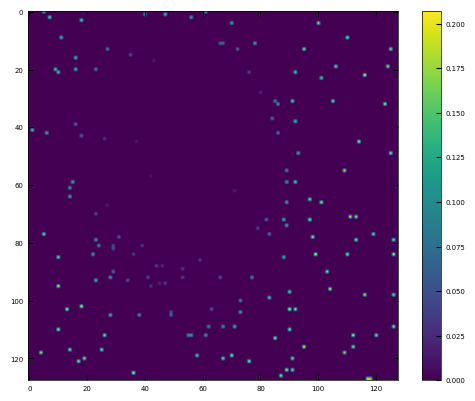

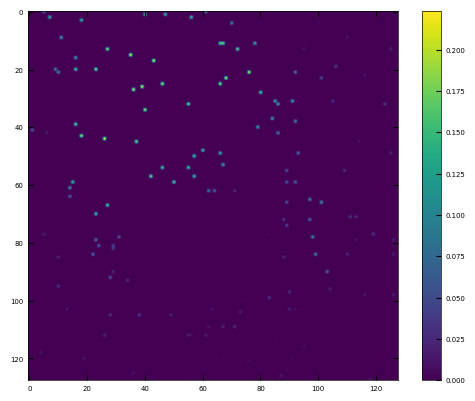

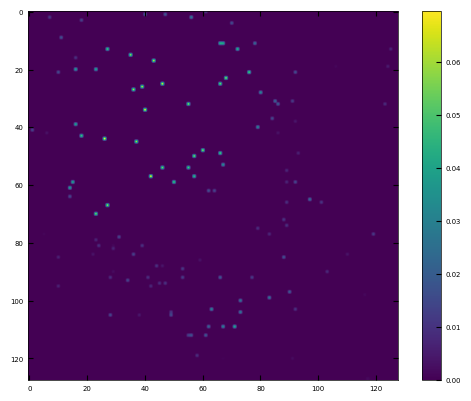

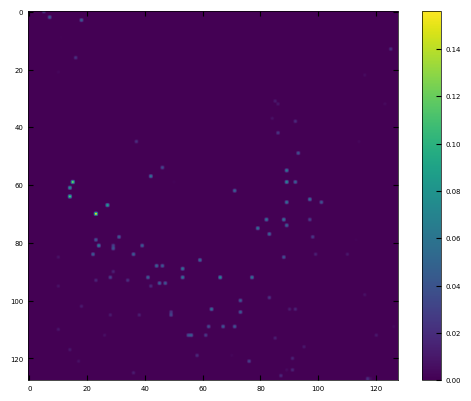

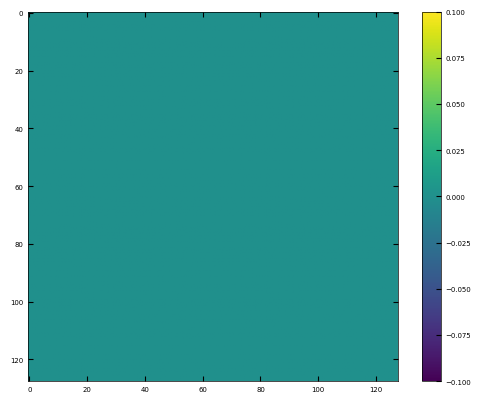

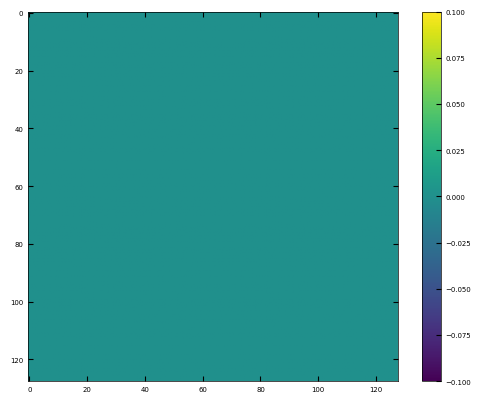

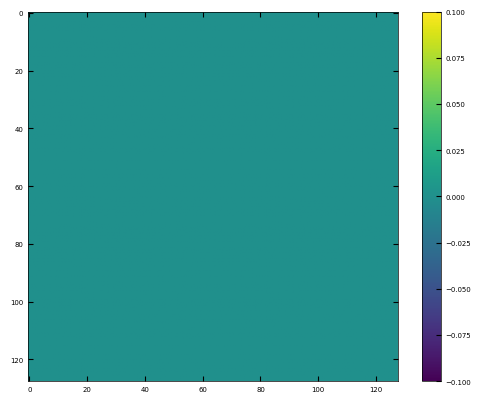

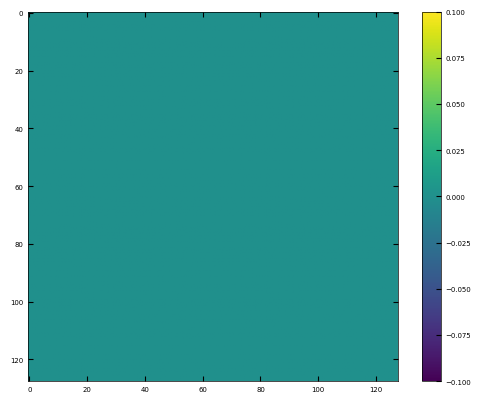

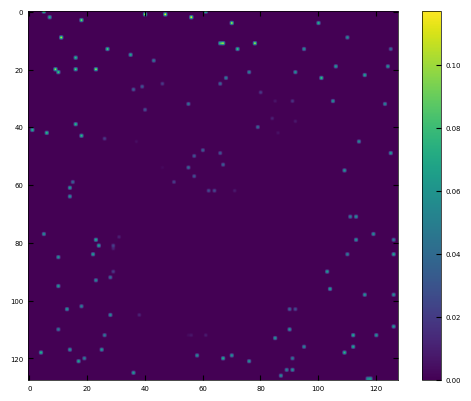

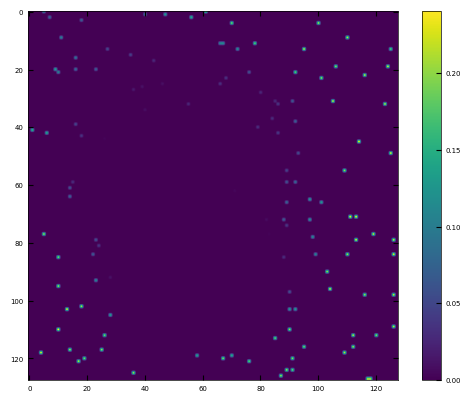

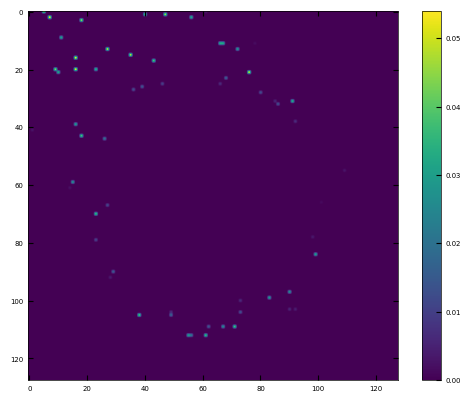

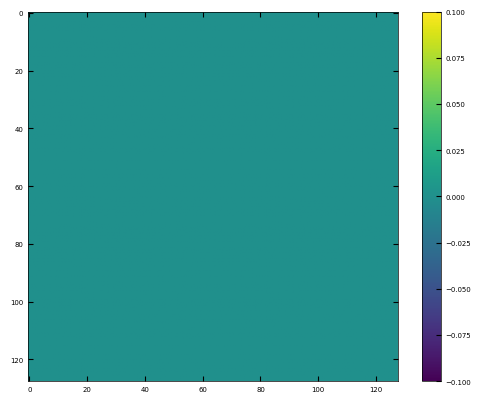

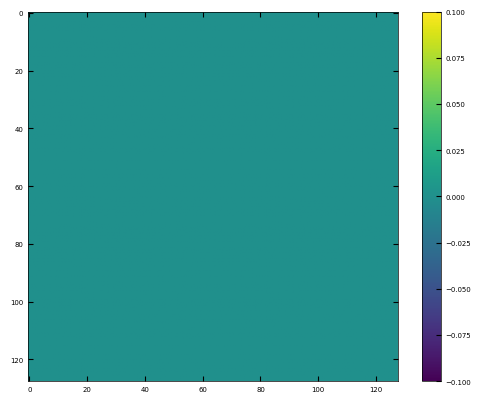

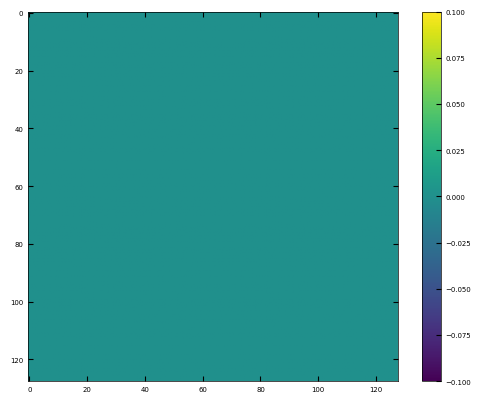

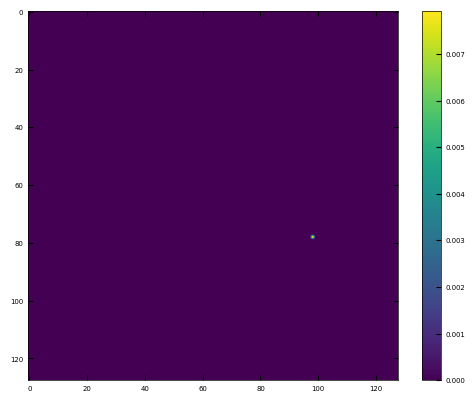

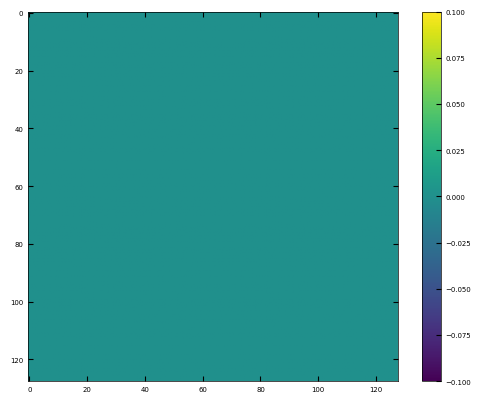

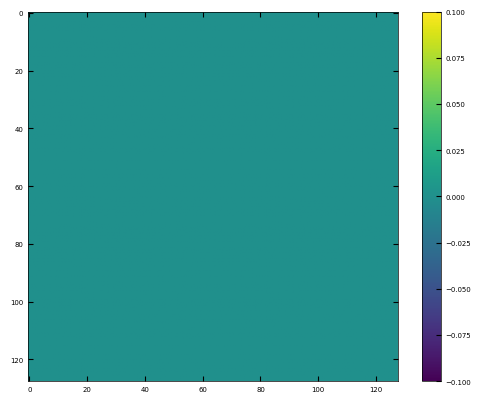

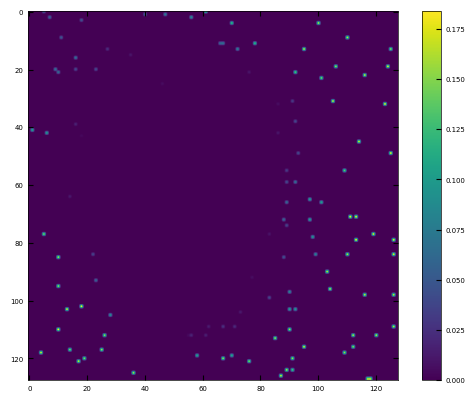

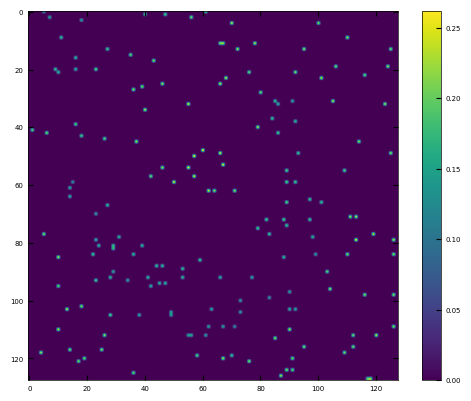

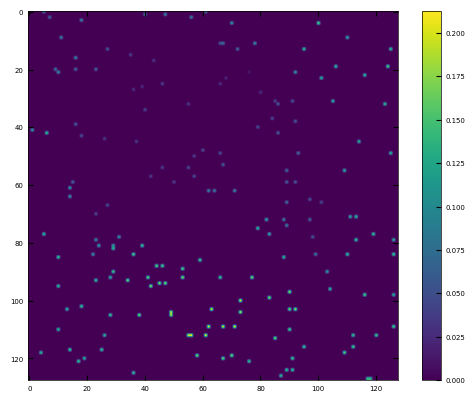

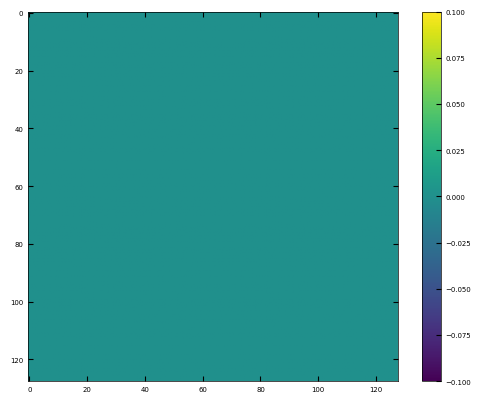

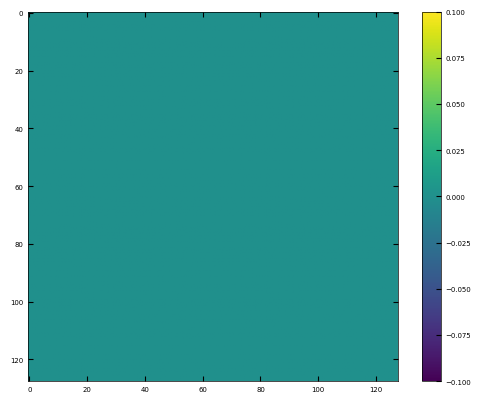

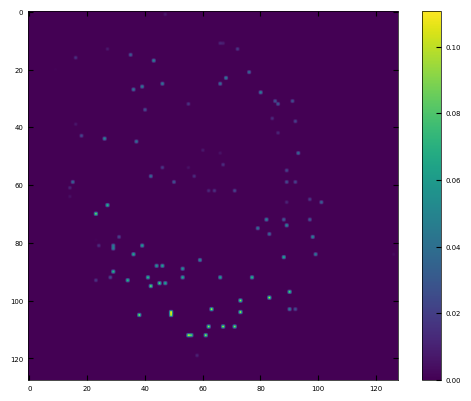

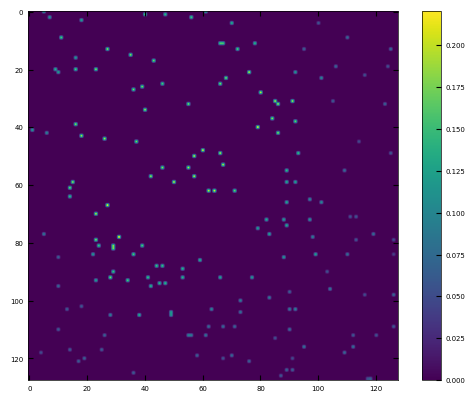

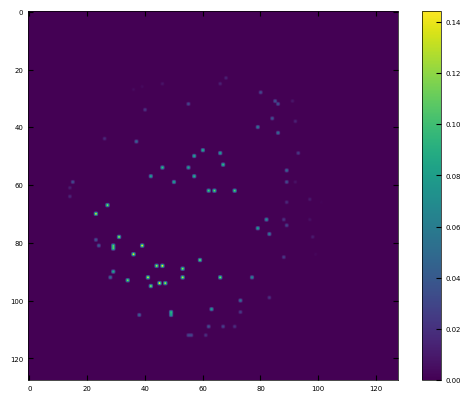

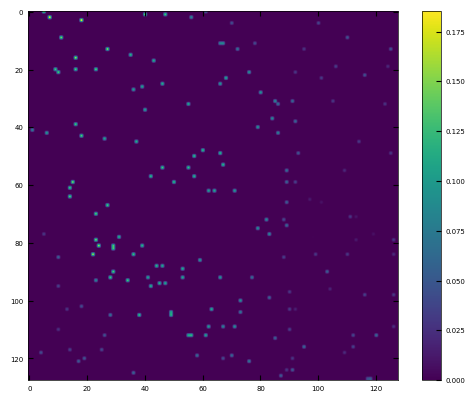

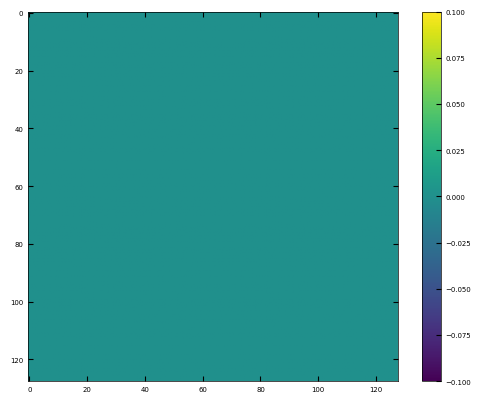

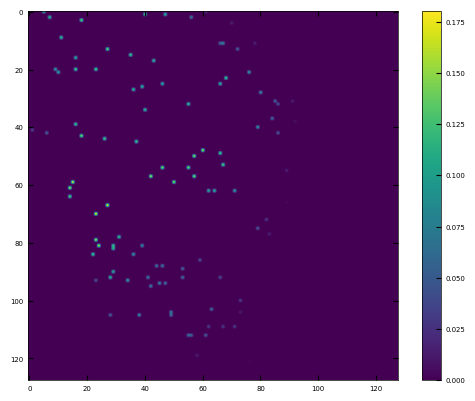

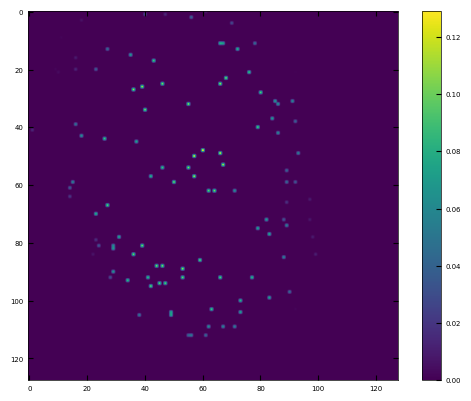

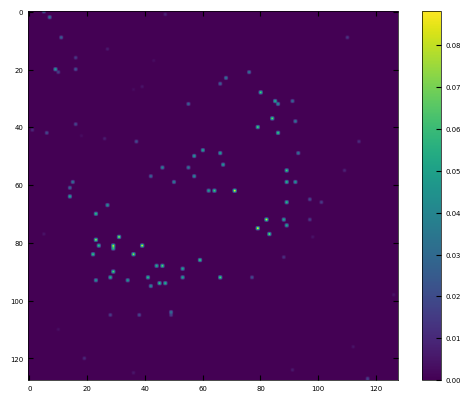

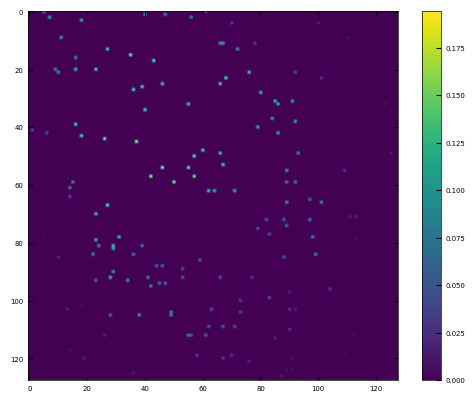

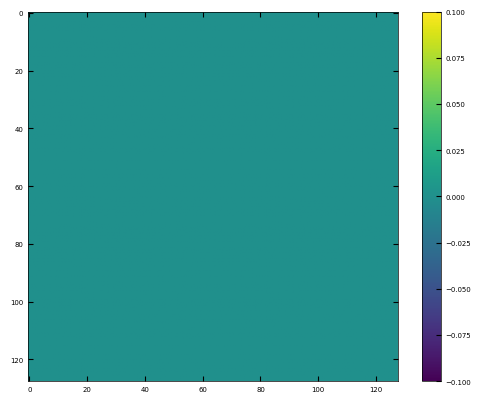

In [62]:
for i in range(32):
    dat = model.embedding[:128*128,i]
    plt.imshow(dat.reshape(128,128))
    plt.colorbar()
    plt.show()

In [48]:
st = 4
## TODO: get rid of translation
## TODO: should I add weights for the relative contributions of spectra and diffraction?
for ep in np.arange(0,100):
    model.Train(
        dset,
        coef_1=(1e-5*ep)//st,
        coef_2=(1e-5*ep)//st,
        epoch_=ep,
        epochs=ep+1,
        with_scheduler=False,
        folder_path="Combined_all_samples_1",
        batch_size=16, # max 16 on h100
        save_emb_every=1
    )

Epoch: 003/004, getting embedding
.............................
Created empty h5 embedding datasets to fill during training


100%|██████████| 31869/31869 [6:26:48<00:00,  1.37it/s]  


Epoch: 003/004 | Train Loss: 1.0215
.............................
saved (2024-02-15)_epoch:0003_l1coef:0.0000_lr:0.00003_trainloss:1.0215 
Epoch: 004/005, getting embedding
.............................
Created empty h5 embedding datasets to fill during training


100%|██████████| 31869/31869 [6:23:05<00:00,  1.39it/s]  


Epoch: 004/005 | Train Loss: 1.0148
.............................
saved (2024-02-16)_epoch:0004_l1coef:0.0000_lr:0.00003_trainloss:1.0148 
Epoch: 005/006, getting embedding
.............................
Created empty h5 embedding datasets to fill during training


100%|██████████| 31869/31869 [6:27:18<00:00,  1.37it/s]  


Epoch: 005/006 | Train Loss: 1.0128
.............................
saved (2024-02-16)_epoch:0005_l1coef:0.0001_lr:0.00003_trainloss:1.0128 
Epoch: 006/007, getting embedding
.............................
Created empty h5 embedding datasets to fill during training


  1%|          | 309/31869 [03:42<6:19:21,  1.39it/s]


KeyboardInterrupt: 

In [59]:
model.checkpoint = 'm3_learning/m3_learning/papers/Multimodal/Combined_all_samples_1/(2024-02-16)_epoch:0005_l1coef:0.0001_lr:0.00003_trainloss:1.0128.pkl'

h = model.open_embedding_h()
h.keys()

<KeysViewHDF5 ['embedding_temp', 'rotation_temp', 'scaleshear_temp', 'translation_temp']>

In [50]:
import glob
import pandas as pd
pathlist = glob.glob('./Combined_all_samples_1/*.pkl')
pathlist.sort()
losses = []

for path in pathlist:
    checkpoint = torch.load(path)
    losses.append(checkpoint['loss_dict'])
    print(checkpoint['loss_dict'])

{'contrastive': 0.00014590917315625426, 'divergence': 0.0, 'l1': 5.657332269328601e-05, 'l2': 0.0, 'mse_1d': 0.017698871265173253, 'mse_2d': 1.0036056198243077}
{'contrastive': 0.0001881908780726284, 'divergence': 0.0, 'l1': 6.62190439640896e-05, 'l2': 0.0, 'mse_1d': 0.017470805900352993, 'mse_2d': 0.997049389721074}
{'contrastive': 0.00021997775456179767, 'divergence': 0.0, 'l1': 7.456166394024449e-05, 'l2': 0.0, 'mse_1d': 0.01744685615081643, 'mse_2d': 0.9950479127614199}


In [51]:
loss_set = pd.DataFrame(losses)
loss_set

,contrastive,divergence,l1,l2,mse_1d,mse_2d
0,0.000146,0.0,0.000057,0.0,0.017699,1.003606
1,0.000188,0.0,0.000066,0.0,0.017471,0.997049
2,0.000220,0.0,0.000075,0.0,0.017447,0.995048


In [52]:
loss_set.sum(axis=1)

0    1.021507
1    1.014775
2    1.012789
dtype: float64

In [114]:

from torch.utils.data import DataLoader
input = DataLoader(dset,batch_size=8,shuffle=True)



In [115]:
batch = next(iter(input))

In [116]:
batch[2].shape

torch.Size([8, 2, 975])

In [117]:
pred = model.autoencoder((batch[1].to('cuda:0').float(),
                                                 batch[2].to('cuda:0').float()))

In [107]:
pred[2].shape

torch.Size([4, 1, 512, 512])

In [108]:
pred[1].shape

torch.Size([4, 2, 975])

In [102]:
pred[2].shape

torch.Size([4, 2, 3])

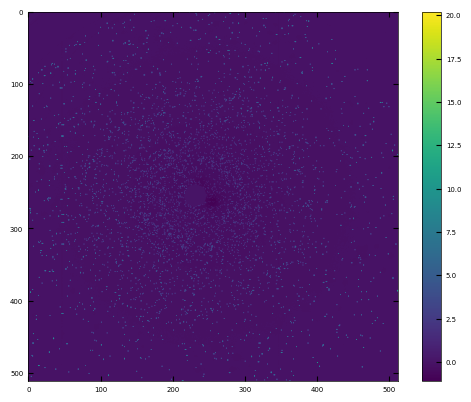

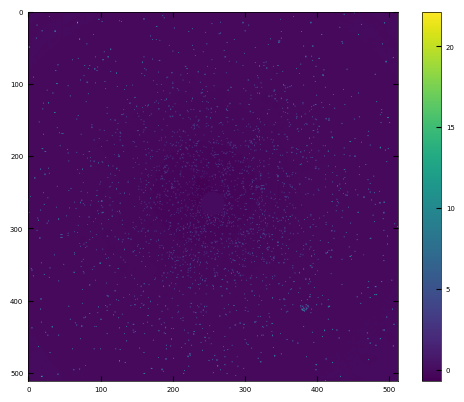

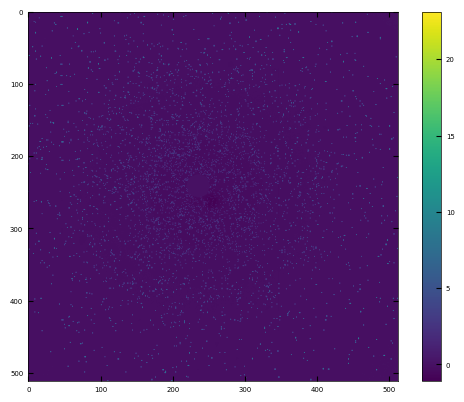

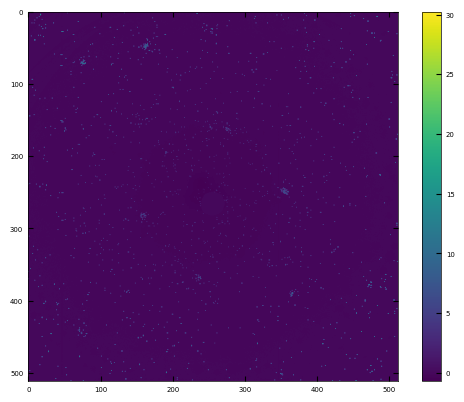

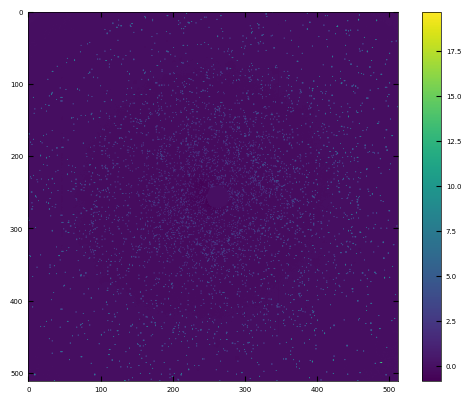

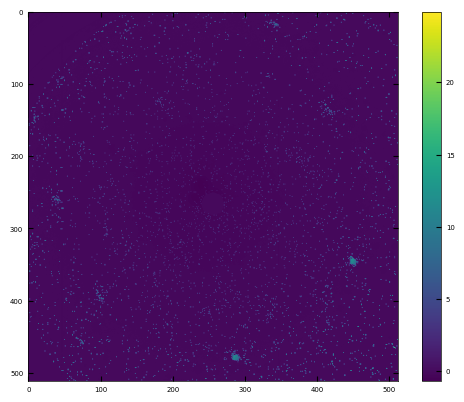

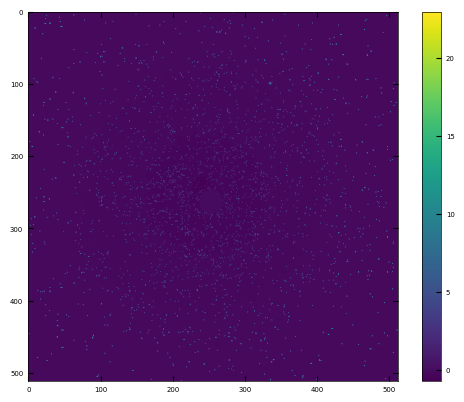

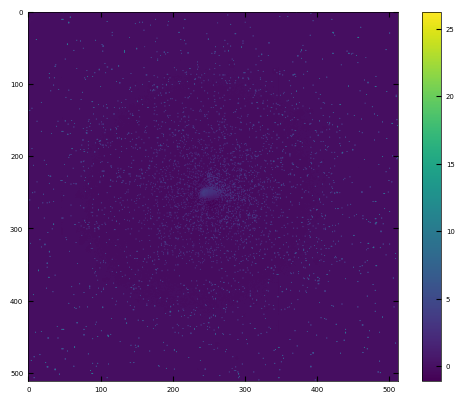

In [120]:
for i in range(8):
    plt.imshow(batch[1][i].squeeze())
    plt.colorbar()
    plt.show()

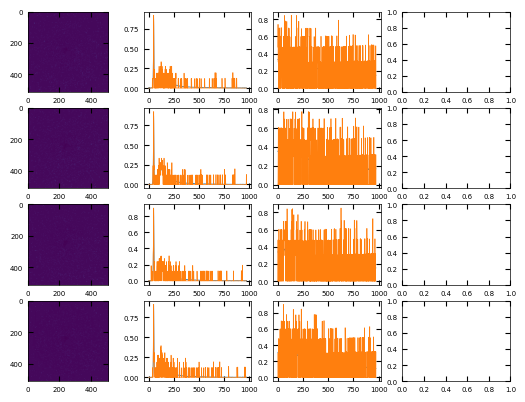

In [112]:
fig,ax = plt.subplots(4,4)
for i in range(4):
    ax[i][0].imshow(pred[2][i].squeeze().detach().cpu())
    ax[i][0].imshow(batch[1][i].squeeze())
    ax[i][1].plot(batch[2][i][0])
    ax[i][1].plot(pred[1][i][0].detach().cpu())
    ax[i][2].plot(batch[2][i][1])
    ax[i][2].plot(pred[1][i][1].detach().cpu())

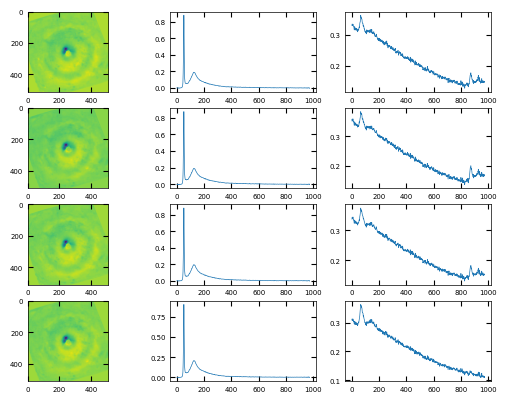

In [111]:
fig,ax = plt.subplots(4,4)
for i in range(4):
    ax[i][0].imshow(pred[2][i].squeeze().detach().cpu())
    ax[i][0].imshow(batch[1][i].squeeze())
    ax[i][1].plot(pred[1][i][0].detach().cpu())
    ax[i][1].plot(batch[2][i][0])
    ax[i][2].plot(pred[1][i][1].detach().cpu())
    ax[i][2].plot(batch[2][i][1])

In [96]:
predicted_1D, predicted_2D  = model.autoencoder((batch[1].to('cuda:0').float(),
                                                 batch[2].to('cuda:0').float()))

ValueError: too many values to unpack (expected 2)

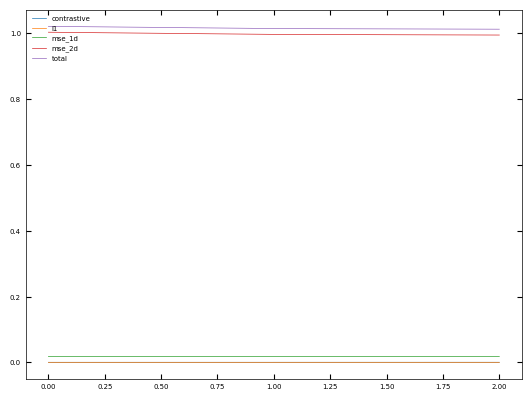

In [74]:

plt.plot(loss_set['contrastive'])
plt.plot(loss_set['l1'])
plt.plot(loss_set['mse_1d'])
plt.plot(loss_set['mse_2d'])
plt.plot(loss_set.sum(axis=1))

plt.legend(['contrastive','l1','mse_1d','mse_2d','total'])


Text(0.5, 1.0, 'total')

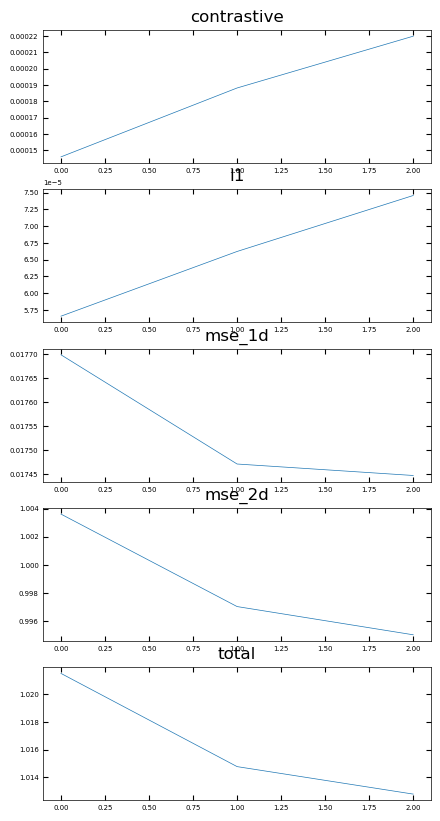

In [53]:
fig, ax = plt.subplots(5,figsize=(5,10))

ax[0].plot(loss_set['contrastive'])
ax[1].plot(loss_set['l1'])
ax[2].plot(loss_set['mse_1d'])
ax[3].plot(loss_set['mse_2d'])
ax[4].plot(loss_set.sum(axis=1))

ax[0].set_title('contrastive')
ax[1].set_title('l1')
ax[2].set_title('mse_1d')
ax[3].set_title('mse_2d')
ax[4].set_title('total')


In [7]:
# # checkpoint = {
# #     "net": model.autoencoder.state_dict(),
# #     'optimizer': model.optimizer.state_dict(),
# #     "epoch": 0,
# #     "encoder_1D": model.encoder_1D.state_dict(),
# #     "encoder_2D": model.encoder_2D.state_dict(),
# #     'decoder_1D': model.decoder_1D.state_dict(),
# #     'decoder_2D': model.decoder_2D.state_dict(),
# # }

# # lr_ = format(model.optimizer.param_groups[0]['lr'], '.5f')
# # file_path = f'./Combined_all_samples/2023_2_1_' +\
# #     f'epoch:{0:04d}_l1coef:{0:.4f}'+'_lr:1e-4' +\
# #     f'_trainloss:{7.9609:.4f}.pkl'
# # torch.save(checkpoint, file_path)
# file_path = model.checkpoint
# h = model.embedding.file
# check = file_path.split('/')[-1][:-4]
# h[f'embedding_{check}'] = h[f'embedding_'] # combined embedding
# h[f'scaleshear_{check}'] = h[f'scaleshear_']
# h[f'rotation_{check}'] = h[f'rotation_'] 
# h[f'translation_{check}'] = h[f'translation_']
# model.embedding = h[f'embedding_{check}']
# model.scale_shear = h[f'scaleshear_{check}']           
# model.rotation = h[f'rotation_{check}']         
# model.translation = h[f'translation_{check}']
# del h[f'embedding_']         
# del h[f'scaleshear_']          
# del h[f'rotation_']          
# del h[f'translation_']
# h.flush()
# # h.close()

### Computes the Embeddings


In [16]:
model.checkpoint

'/home/m3learning/Northwestern/m3_learning/m3_learning/papers/Multimodal/Combined_all_samples/(2024-02-13)_epoch:0002_l1coef:0.0000_lr:0.00003_trainloss:7.2645.pkl'

<KeysViewHDF5 ['embedding_temp', 'rotation_temp', 'scaleshear_temp', 'translation_temp']>
(509904, 32)


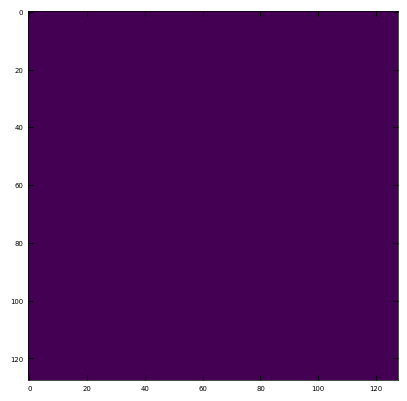

In [24]:
h = model.open_embedding_h()
print(h.keys())
print(h['embedding_temp'].shape)
plt.imshow(h['embedding_temp'][:128*128,0].reshape(128,128))

In [ ]:
model.autoencoder.get_embeddings

True

In [65]:
# run if you did not autosave embedding (takes about 1:15 minutes on h100, or 2.5 hr on titan)
model.autoencoder.get_embeddings = True
model.get_embedding(dset, batch_size=32, no_calculate=False)

  0%|          | 0/15935 [00:00<?, ?it/s]

100%|██████████| 15935/15935 [1:18:58<00:00,  3.36it/s]


### Visualizes the Embeddings


In [69]:
viz.channels = [i for i in range(model.embedding_size)]
viz.scalebar_ = {"width": 250, "scale length": 100, "units": "nm"}
viz.model = model
viz.embeddings(
    dset.meta,
    mod=4,
    scalebar_=viz.scalebar_,
    savefolder='emb_affine_epoch_6/'
    )

  0%|          | 0/27 [00:00<?, ?it/s]

100%|██████████| 27/27 [03:13<00:00,  7.15s/it]


In [70]:
# Visualize affine transforms
viz.affines(
    dset.meta,
    scalebar_=viz.scalebar_,
    figsize=(5, 8),
    savefolder='emb_affine_epoch_6/'
    )

  0%|          | 0/27 [00:00<?, ?it/s]

100%|██████████| 27/27 [01:12<00:00,  2.69s/it]


### Clustering

In [66]:
scaled_emb_affines = model.stack_emb_affines()

Getting scree plot...


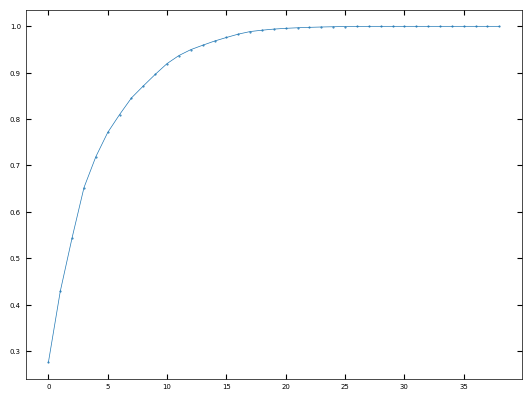

PCA with 17 components...
Getting elbow plot...


100%|██████████| 55/55 [00:19<00:00,  2.82it/s]


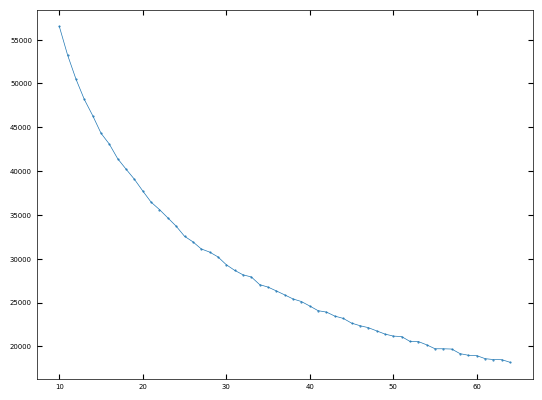

Clustering with 30 clusters...
Done


In [71]:
# will create scree and elbow plots if you aren't sure how many components/clusters are needed

# cluster_list,labels = model.get_clusters(dset,scaled_emb_affines,n_components=25,n_clusters=20)

cluster_list,labels = model.get_clusters(dset,scaled_emb_affines,n_components=17,n_clusters=30)

### visualize clusters

In [16]:
model.embedding_size


32

In [15]:
viz.printer.basepath

'./../../../../Northwestern_link/Northwestern_Multimodal_Figures/'

In [72]:
viz.clustered_images(dset,cluster_list,labels,
                     save_folder='clustered_30_epoch_6/',
                     printer = viz.printer)

100%|██████████| 27/27 [00:12<00:00,  2.24it/s]


### Generates Data from the Latent Space


In [19]:
h = model.open_embedding_h()

In [22]:
# checkpoint = '/home/m3learning/Northwestern/m3_learning/m3_learning/papers/HE_nanoparticles/Combined_all_samples/(2023-08-21)_epoch:0006_l1coef:0.0000_lr:0.00003_trainloss:0.6229.pkl'

# embedding = model.embedding
# channels = []
# for i in range(32):
#     if embedding[:,i].max()>0.03: channels.append(i)
# channels

# viz.channels = [i for i in range(32) if (model.embedding[:,i]).any()]
# ranges = []
# for c in channels:
#     ranges.append([embedding[:,c].min(),embedding[:,c].max()])
    
# model.embedding = embedding
viz.model = model
# folder_name = "Generator_of_epoch_all_ch"

In [24]:
# # folder_name = "Generator_of_epoch_6_all_ch"
# model.generate_range(dset.meta, model.checkpoint,channels=viz.channels,
#                                 generator_iters=25,averaging_number=50,
#                                 overwrite=True)

0 AgCu(1)


100%|██████████| 25/25 [00:09<00:00,  2.74it/s]


1 AgCu(2)


100%|██████████| 25/25 [00:04<00:00,  5.90it/s]


2 AgCu(3)


100%|██████████| 25/25 [00:01<00:00, 14.16it/s]


3 AgCu(5)


100%|██████████| 25/25 [00:01<00:00, 14.18it/s]


4 AgCu(6)


100%|██████████| 25/25 [00:01<00:00, 14.25it/s]


5 AgCu(9)


100%|██████████| 25/25 [00:01<00:00, 14.21it/s]


6 AgCu(10)


100%|██████████| 25/25 [00:01<00:00, 14.20it/s]


7 AgCu(11)


100%|██████████| 25/25 [00:01<00:00, 14.19it/s]


8 AgCu(13)


100%|██████████| 25/25 [00:01<00:00, 14.18it/s]


9 AgCu(14)


100%|██████████| 25/25 [00:04<00:00,  5.92it/s]


10 AgCu(15)


100%|██████████| 25/25 [00:04<00:00,  5.94it/s]


11 AgCu(16)


100%|██████████| 25/25 [00:01<00:00, 14.17it/s]


12 AgCu(17)


100%|██████████| 25/25 [00:01<00:00, 14.16it/s]


13 AgCu(18)


100%|██████████| 25/25 [00:04<00:00,  5.91it/s]


14 AgCu(19)


100%|██████████| 25/25 [00:04<00:00,  5.96it/s]


15 AgCu(20)


100%|██████████| 25/25 [00:01<00:00, 14.17it/s]


16 AgCu(21)


100%|██████████| 25/25 [00:01<00:00, 14.18it/s]


17 AgCu(22)


100%|██████████| 25/25 [00:01<00:00, 14.34it/s]


18 AgCu(23)


100%|██████████| 25/25 [00:04<00:00,  6.01it/s]


19 AgCu(24)


100%|██████████| 25/25 [00:04<00:00,  5.96it/s]


20 AgCu(26)


100%|██████████| 25/25 [00:01<00:00, 14.25it/s]


21 AgCu(41)


100%|██████████| 25/25 [00:01<00:00, 14.30it/s]


22 AgCu(42)


100%|██████████| 25/25 [00:01<00:00, 14.27it/s]


23 AgCu(43)


100%|██████████| 25/25 [00:01<00:00, 14.23it/s]


24 AgCu(44)


100%|██████████| 25/25 [00:01<00:00, 14.27it/s]


25 AgCu(45)


100%|██████████| 25/25 [00:01<00:00, 14.28it/s]


26 AgCu(46)


100%|██████████| 25/25 [00:01<00:00, 14.21it/s]


27 AgCu(48)


100%|██████████| 25/25 [00:01<00:00, 14.30it/s]


28 AgCu(50)


100%|██████████| 25/25 [00:01<00:00, 14.17it/s]


29 AgCu(53)


100%|██████████| 25/25 [00:01<00:00, 14.18it/s]


30 AgCu(54)


100%|██████████| 25/25 [00:01<00:00, 14.24it/s]


31 Au30Ag10Co20Ni40(62)


100%|██████████| 25/25 [00:01<00:00, 14.24it/s]


32 Au30Ag10Co20Ni40(63)


100%|██████████| 25/25 [00:01<00:00, 14.27it/s]


33 Au30Ag10Co20Ni40(64)


100%|██████████| 25/25 [00:01<00:00, 14.26it/s]


34 Au30Ag10Co20Ni40(65)


100%|██████████| 25/25 [00:01<00:00, 14.30it/s]


35 Au30Ag10Co20Ni40(66)


100%|██████████| 25/25 [00:04<00:00,  5.99it/s]


36 Au30Ag10Co20Ni40(67)


100%|██████████| 25/25 [00:04<00:00,  5.98it/s]


37 Au30Ag10Co20Ni40(68)


100%|██████████| 25/25 [00:04<00:00,  6.00it/s]


38 Au30Ag10Co20Ni40(69)


100%|██████████| 25/25 [00:01<00:00, 14.18it/s]


39 Au30Ag10Co20Ni40(70)


100%|██████████| 25/25 [00:01<00:00, 14.12it/s]


40 Au30Ag10Co20Ni40(71)


100%|██████████| 25/25 [00:04<00:00,  5.95it/s]


41 Au30Cu20Co20Ni30(1)


100%|██████████| 25/25 [00:01<00:00, 14.10it/s]


42 Au30Cu20Co20Ni30(2)


100%|██████████| 25/25 [00:01<00:00, 14.17it/s]


43 Au30Cu20Co20Ni30(6)


100%|██████████| 25/25 [00:01<00:00, 14.32it/s]


44 Au30Cu20Co20Ni30(7)


100%|██████████| 25/25 [00:01<00:00, 14.20it/s]


45 Au30Cu20Co20Ni30(8)


100%|██████████| 25/25 [00:01<00:00, 14.12it/s]


46 Au30Cu20Co20Ni30(9)


100%|██████████| 25/25 [00:01<00:00, 14.13it/s]


47 Au30Cu20Co20Ni30(10)


100%|██████████| 25/25 [00:01<00:00, 14.18it/s]


48 Au30Cu20Co20Ni30(11)


100%|██████████| 25/25 [00:04<00:00,  5.97it/s]


49 Au30Cu20Co20Ni30(12)


100%|██████████| 25/25 [00:01<00:00, 14.17it/s]


50 Au30Cu20Co20Ni30(13)


100%|██████████| 25/25 [00:01<00:00, 14.16it/s]


51 Au30Cu20Co20Ni30(14)


100%|██████████| 25/25 [00:01<00:00, 14.09it/s]


52 Au30Cu20Co20Ni30(15)


100%|██████████| 25/25 [00:01<00:00, 14.14it/s]


53 Au30Cu20Co20Ni30(16)


100%|██████████| 25/25 [00:01<00:00, 14.18it/s]


54 Au30Cu20Co20Ni30(17)


100%|██████████| 25/25 [00:01<00:00, 14.14it/s]


55 Au30Cu20Co20Ni30(18)


100%|██████████| 25/25 [00:01<00:00, 14.16it/s]


56 Au30Cu20Co20Ni30(19)


100%|██████████| 25/25 [00:04<00:00,  5.97it/s]


57 Au30Cu20Co20Ni30(20)


100%|██████████| 25/25 [00:01<00:00, 14.13it/s]


58 Au30Cu20Co20Ni30(21)


100%|██████████| 25/25 [00:01<00:00, 14.19it/s]


59 Au30Cu20Co20Ni30(22)


100%|██████████| 25/25 [00:01<00:00, 14.34it/s]


60 Au30Cu20Co20Ni30(23)


100%|██████████| 25/25 [00:04<00:00,  5.98it/s]


61 Au30Cu20Co20Ni30(24)


100%|██████████| 25/25 [00:01<00:00, 14.20it/s]


62 Au30Cu20Co20Ni30(25)


100%|██████████| 25/25 [00:01<00:00, 14.15it/s]


63 Au30Cu20Co20Ni30(27)


100%|██████████| 25/25 [00:01<00:00, 14.22it/s]


64 Au30Cu20Co20Ni30(28)


100%|██████████| 25/25 [00:01<00:00, 14.20it/s]


65 Au30Cu20Co20Ni30(29)


100%|██████████| 25/25 [00:01<00:00, 14.12it/s]


66 Au30Cu20Co20Ni30(30)


100%|██████████| 25/25 [00:04<00:00,  5.93it/s]


67 Au30Cu20Co20Ni30(31)


100%|██████████| 25/25 [00:01<00:00, 14.17it/s]


68 Au30Cu20Co20Ni30(32)


100%|██████████| 25/25 [00:01<00:00, 14.23it/s]


69 Au30Cu20Co20Ni30(33)


100%|██████████| 25/25 [00:01<00:00, 14.15it/s]


70 Au30Cu20Co20Ni30(34)


100%|██████████| 25/25 [00:04<00:00,  5.99it/s]


71 Au30Cu20Co20Ni30(35)


100%|██████████| 25/25 [00:01<00:00, 14.22it/s]


72 Au30Cu20Co20Ni30(36)


100%|██████████| 25/25 [00:01<00:00, 14.22it/s]


73 Au30Cu20Co20Ni30(37)


100%|██████████| 25/25 [00:04<00:00,  5.91it/s]


74 Au30Cu20Co20Ni30(38)


100%|██████████| 25/25 [00:01<00:00, 14.08it/s]


75 Au30Cu20Co20Ni30(40)


100%|██████████| 25/25 [00:01<00:00, 14.20it/s]


76 Au30Cu20Co20Ni30(41)


100%|██████████| 25/25 [00:01<00:00, 14.19it/s]


77 Au30Cu20Co20Ni30(42)


100%|██████████| 25/25 [00:04<00:00,  5.97it/s]


78 Au30Cu20Co20Ni30(43)


100%|██████████| 25/25 [00:04<00:00,  6.04it/s]


79 Au30Cu20Co20Ni30(44)


100%|██████████| 25/25 [00:01<00:00, 14.10it/s]


80 Au30Cu20Co20Ni30(45)


100%|██████████| 25/25 [00:01<00:00, 14.16it/s]


81 Au30Cu20Co20Ni30(46)


100%|██████████| 25/25 [00:01<00:00, 14.17it/s]


82 Au30Cu20Co20Ni30(49)


100%|██████████| 25/25 [00:01<00:00, 14.15it/s]


83 Au30Cu20Co20Ni30(50)


100%|██████████| 25/25 [00:01<00:00, 14.09it/s]


84 Au30Cu20Co20Ni30(51)


100%|██████████| 25/25 [00:01<00:00, 14.11it/s]


85 Au30Cu20Co20Ni30(53)


100%|██████████| 25/25 [00:04<00:00,  5.91it/s]


86 Au30Cu20Co20Ni30(54)


100%|██████████| 25/25 [00:01<00:00, 14.11it/s]


87 Au30Cu20Co20Ni30(55)


100%|██████████| 25/25 [00:01<00:00, 14.16it/s]


88 Au30Cu20Co20Ni30(56)


100%|██████████| 25/25 [00:01<00:00, 14.25it/s]


89 Au30Cu20Co20Ni30(57)


100%|██████████| 25/25 [00:01<00:00, 14.18it/s]


90 Au30Cu20Co20Ni30(58)


100%|██████████| 25/25 [00:01<00:00, 14.12it/s]


91 Au30Cu20Co20Ni30(61)


100%|██████████| 25/25 [00:04<00:00,  5.81it/s]


92 AuCu(3)


100%|██████████| 25/25 [00:01<00:00, 14.05it/s]


93 AuCu(4)


100%|██████████| 25/25 [00:01<00:00, 14.06it/s]


94 AuCu(5)


100%|██████████| 25/25 [00:01<00:00, 14.05it/s]


95 AuCu(6)


100%|██████████| 25/25 [00:01<00:00, 14.18it/s]


96 AuCu(7)


100%|██████████| 25/25 [00:01<00:00, 14.13it/s]


97 AuCu(8)


100%|██████████| 25/25 [00:01<00:00, 14.15it/s]


98 AuCu(9)


100%|██████████| 25/25 [00:04<00:00,  5.83it/s]


99 AuCu(10)


100%|██████████| 25/25 [00:01<00:00, 14.10it/s]


100 AuCu(11)


100%|██████████| 25/25 [00:01<00:00, 14.13it/s]


101 AuCu(12)


100%|██████████| 25/25 [00:01<00:00, 14.08it/s]


102 AuCu(13)


100%|██████████| 25/25 [00:01<00:00, 14.12it/s]


103 AuCu(14)


100%|██████████| 25/25 [00:01<00:00, 14.15it/s]


104 AuCu(16)


100%|██████████| 25/25 [00:01<00:00, 14.12it/s]


105 AuCu(18)


100%|██████████| 25/25 [00:04<00:00,  5.94it/s]


106 AuCu(19)


100%|██████████| 25/25 [00:01<00:00, 14.09it/s]


107 AuCu(20)


100%|██████████| 25/25 [00:01<00:00, 14.08it/s]


108 AuCu(21)


100%|██████████| 25/25 [00:01<00:00, 14.06it/s]


109 AuCu(22)


100%|██████████| 25/25 [00:04<00:00,  5.94it/s]


110 AuCu(24)


100%|██████████| 25/25 [00:01<00:00, 14.18it/s]


111 AuCu(25)


100%|██████████| 25/25 [00:01<00:00, 14.07it/s]


112 AuCu(26)


100%|██████████| 25/25 [00:01<00:00, 14.05it/s]


113 AuCu(28)


100%|██████████| 25/25 [00:01<00:00, 14.05it/s]


114 AuCu(31)


100%|██████████| 25/25 [00:01<00:00, 14.03it/s]


115 AuCu(32)


100%|██████████| 25/25 [00:01<00:00, 14.11it/s]


116 AuCu(33)


100%|██████████| 25/25 [00:04<00:00,  5.95it/s]


117 AuCu(34)


100%|██████████| 25/25 [00:01<00:00, 14.25it/s]


118 AuCu(35)


100%|██████████| 25/25 [00:01<00:00, 14.12it/s]


119 AuCu(36)


100%|██████████| 25/25 [00:04<00:00,  5.89it/s]


120 AuCu(37)


100%|██████████| 25/25 [00:01<00:00, 14.03it/s]


121 AuCu(38)


100%|██████████| 25/25 [00:01<00:00, 13.99it/s]


122 AuCu(39)


100%|██████████| 25/25 [00:01<00:00, 14.07it/s]


123 AuCu(40)


100%|██████████| 25/25 [00:01<00:00, 14.05it/s]


### Visualize generated images

In [76]:
dset.meta['particle_inds'][0]

0

In [40]:
len(viz.channels)

29

In [48]:
hg = model.open_generated_h()


In [49]:
hg.keys()

<KeysViewHDF5 ['(2023-08-21)_epoch:0006_l1coef:0.0000_lr:0.00003_trainloss:0.6229']>

In [83]:
h=model.open_embedding_h()
h.close()
h=model.open_generated_h()
h.close()

In [ ]:
printing

In [62]:
folder_name

'Generator_of_epoch_6_all_ch'

In [77]:
p_name='AuCu(40)'

In [78]:
f'{printing.basepath}{folder_name}/{p_name}/*'


'./../../Northwestern_Figures/Generator_of_epoch_6_all_ch/AuCu(40)/*'

In [79]:
existing = [item.split('/')[-1] for item in glob.glob(f'{printing.basepath}{folder_name}/{p_name}/*')]
# if p_name+'_embedding_maps.png' in existing:
#     print('skipping',savefolder+p_name+'_embedding_maps.png')
#     continue

In [80]:
existing

['0015_maps.png',
 '0014_maps.png',
 '0002_maps.png',
 '0022_maps.png',
 '0001_maps.png',
 '0013_maps.png',
 '0004_maps.png',
 '0010_maps.png',
 '0018_maps.png',
 '0021_maps.png',
 '0016_maps.png',
 '0006_maps.png',
 '0017_maps.png',
 '0000_maps.png',
 '0003_maps.png',
 '0007_maps.png',
 '0024_maps.png',
 '0005_maps.png',
 '0008_maps.png',
 '0012_maps.png',
 '0011_maps.png',
 '0023_maps.png',
 '0009_maps.png',
 '0020_maps.png',
 '0019_maps.png']

[autoreload of nn.STEM_AE.Viz failed: Traceback (most recent call last):
  File "/home/m3learning/anaconda3/envs/northwestern/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/home/m3learning/anaconda3/envs/northwestern/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 496, in superreload
    update_generic(old_obj, new_obj)
  File "/home/m3learning/anaconda3/envs/northwestern/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 393, in update_generic
    update(a, b)
  File "/home/m3learning/anaconda3/envs/northwestern/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 361, in update_class
    update_instances(old, new)
  File "/home/m3learning/anaconda3/envs/northwestern/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 315, in update_instances
    refs = gc.get_referrers(old)
           ^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt


0 AgCu(1)


 80%|████████  | 20/25 [02:31<00:37,  7.59s/it]


KeyboardInterrupt: 

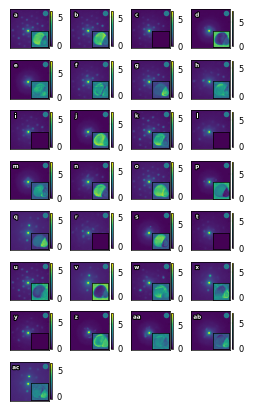

In [82]:
folder_name = "Generator_of_epoch_6_all_ch_1"
viz.generator_images( dset.meta, model.generated,
                     scaler=dset.scaler,
    folder_name=folder_name,
    figsize=(7.5,4),
    cbar_number_format="%.02d",
    shape_=(128,128,128,128),
    divider_=False,
    graph_layout=(len(viz.channels),4),
    labelfigs_=True
    )

### Builds a Movie


In [198]:
folder_name = "Generator_of_epoch_6_all_ch"


In [200]:
# Builds a Movie
folder = f"{fig_path}{folder_name}/"
# output_folder = "./movies_unscaled/"
output_folder = "./movies/"


for particle in dset.meta['particle_list']:
    # particle=particle.replace('_',' ')
    print(particle)
    make_movie(f"Generator {particle}", f'{folder}{particle}/', 
               output_folder, "png", 3)

AgCu(1)
AgCu(2)


libpng error: Read Error


AgCu(3)
AgCu(5)
AgCu(6)
AgCu(9)
AgCu(10)
AgCu(11)
AgCu(13)
AgCu(14)
AgCu(15)
AgCu(16)
AgCu(17)
AgCu(18)
AgCu(19)
AgCu(20)
AgCu(21)
AgCu(22)
AgCu(23)
AgCu(24)
AgCu(26)
AgCu(41)
AgCu(42)
AgCu(43)
AgCu(44)
AgCu(45)
AgCu(46)
AgCu(48)
AgCu(50)
AgCu(53)
AgCu(54)
Au30Ag10Co20Ni40(62)
Au30Ag10Co20Ni40(63)
Au30Ag10Co20Ni40(64)
Au30Ag10Co20Ni40(65)
Au30Ag10Co20Ni40(66)
Au30Ag10Co20Ni40(67)
Au30Ag10Co20Ni40(68)
Au30Ag10Co20Ni40(69)
Au30Ag10Co20Ni40(70)
Au30Ag10Co20Ni40(71)
Au30Cu20Co20Ni30(1)
Au30Cu20Co20Ni30(2)
Au30Cu20Co20Ni30(6)
Au30Cu20Co20Ni30(7)
Au30Cu20Co20Ni30(8)
Au30Cu20Co20Ni30(9)
Au30Cu20Co20Ni30(10)
Au30Cu20Co20Ni30(11)
Au30Cu20Co20Ni30(12)
Au30Cu20Co20Ni30(13)
Au30Cu20Co20Ni30(14)


IndexError: list index out of range

### Generate from specified embedding range

In [ ]:
g_folder = str(channels).replace(', ','_')[1:-1]

In [ ]:
g_folder

'0_1_4_7_8_10_14_17_19_22_25_28_31'

In [ ]:
fig_path

'./../../Northwestern/auagconi_aucuconi/2021_07_10_stela_80kV/Au30Ag10Co20Ni40_Figures/'

In [ ]:
# Builds a Movie
folder = f"{fig_path}/generator_{g_folder}"
output_folder = "./movies/"

In [ ]:
'generator_[1, 3, 8, 10, 11, 13, 15, 17, 22, 26]'

In [ ]:
# Builds a Movie
folder = f"{fig_path}/generator_{g_folder}"
output_folder = "./movies/"

# function to make the movie
make_movie("Domain Generator", folder, output_folder, "png", 3)